#### Импорты

In [463]:
import numpy as np
import pandas as pd
import os
import gzip
import io
import matplotlib.pyplot as plt
import seaborn as sns

# Предобработка логов

In [464]:
# vibo: папка где лежат сырые логи
# vibo: ВАЖНО!!! ФАЙЛЫ В ПАПКЕ ДОЛЖНЫ БЫТЬ ОТСОРТИРОВАНЫ ОТ СТАРЫХ К НОВЫМ
# (latest.log...ok - должен прочитаться последним)
link = '/content/drive/MyDrive/minecraft/logs/'

In [465]:
# vibo: задаем имена установленных плагинов
plug_names = ['WorldEdit', 'WorldGuard', 'HolographicDisplays']

In [466]:
# vibo: лист для имен файлов в папке
file_names = []
# vibo: лист для логов
row_logs = []

for root, dirs, files in os.walk(link):  
    for filename in files:
      file_names.append(filename)

file_names = sorted(file_names)

for filename in file_names:
  # vibo: в папке файлы двух видов *log.gz и *.log (один последний)
  # vibo: обрабатываем файлы *log.gz
  if filename.endswith("gz"):
    # vibo: создаем путь до файла
    path = link + filename
    # vibo: разархивируем и читаем с учетом кодировки
    with gzip.open(path, 'rb') as f:
      with io.TextIOWrapper(f, encoding='utf-8') as decoder:
        # vibo: в content - полное содержимое одного лога
        content = decoder.read()
        # vibo: обрезаем перенос строк
        for i in content.split('\n'):
          # vibo: выделяем из имени файла дату и добавляем ее в начало строки
          row_logs.append(filename[:-9] + ' ' + i)
          # vibo: сохраняем крайнюю дату она понадобится ниже для последнего файла без даты
          last_date = filename[:-9]
    print(f'{filename}...ok' )

  # vibo: это обработка файла latest.log
  else:
    with open(link + 'latest.log', encoding="UTF-8") as file_in: 
        for line in file_in:
            messege = line.rstrip("\n")
            row_logs.append(last_date + ' ' + messege)
    print(f'{filename}...ok' )

2023-02-13-1.log.gz...ok
2023-02-13-2.log.gz...ok
2023-02-13-3.log.gz...ok
2023-02-13-4.log.gz...ok
2023-02-14-1.log.gz...ok
2023-02-14-2.log.gz...ok
2023-02-14-3.log.gz...ok
2023-02-17-1.log.gz...ok
2023-03-03-1.log.gz...ok
2023-03-03-2.log.gz...ok
2023-03-03-3.log.gz...ok
2023-03-04-1.log.gz...ok
2023-03-04-2.log.gz...ok
2023-03-04-3.log.gz...ok
2023-03-04-4.log.gz...ok
2023-03-04-5.log.gz...ok
2023-03-05-1.log.gz...ok
2023-03-05-2.log.gz...ok
2023-03-05-3.log.gz...ok
2023-03-06-1.log.gz...ok
2023-03-06-2.log.gz...ok
2023-03-06-3.log.gz...ok
2023-03-06-4.log.gz...ok
2023-03-07-1.log.gz...ok
2023-03-08-1.log.gz...ok
2023-03-08-2.log.gz...ok
2023-03-08-3.log.gz...ok
2023-03-09-1.log.gz...ok
latest.log...ok


In [467]:
# vibo: проверяем последнюю строку
row_logs[3304]

'2023-03-05 [14:54:55] [Server thread/INFO]: vibo fell out of the world'

In [ ]:
# vibo: делаем датафрейм
row_logs = pd.DataFrame({
    'row_logs': row_logs
})
row_logs

,row_logs
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...
4,2023-02-13
...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...


In [ ]:
# vibo: выделяем дату
row_logs['date'] = row_logs['row_logs'].map(lambda x: x[:11])
# vibo: сохраняем в отдельный столбец оставшиеся данные
row_logs['row_logs_split_0'] = row_logs['row_logs'].map(lambda x: x[11:])
row_logs

,row_logs,date,row_logs_split_0
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...
4,2023-02-13,2023-02-13,
...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...


In [ ]:
# vibo: проверяем длину каждой строки, где-то остались пустые строки (len = 0)
row_logs['__len__'] = row_logs['row_logs_split_0'].map(lambda x: len(x))
row_logs

,row_logs,date,row_logs_split_0,__len__
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,60
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,85
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,53
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,117
4,2023-02-13,2023-02-13,,0
...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,102
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,55
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,165
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,71


In [ ]:
row_logs[row_logs['__len__'] == 0]

,row_logs,date,row_logs_split_0,__len__
4,2023-02-13,2023-02-13,,0
234,2023-02-13,2023-02-13,,0
405,2023-02-13,2023-02-13,,0
571,2023-02-13,2023-02-13,,0
574,2023-02-14,2023-02-14,,0
752,2023-02-14,2023-02-14,,0
934,2023-02-14,2023-02-14,,0
1217,2023-02-17,2023-02-17,,0
1406,2023-03-03,2023-03-03,,0
1656,2023-03-03,2023-03-03,,0


In [ ]:
# vibo: удалим 23 строки
row_logs[row_logs['__len__'] == 0].count()

row_logs            28
date                28
row_logs_split_0    28
__len__             28
dtype: int64

In [ ]:
# vibo: удаляем 0, получили 5083 информативных сообщения
row_logs = row_logs[row_logs['__len__'] != 0]
row_logs

,row_logs,date,row_logs_split_0,__len__
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,60
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,85
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,53
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,117
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,60
...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,102
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,55
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,165
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,71


In [ ]:
# vibo: выделяем время
row_logs['time'] = row_logs['row_logs_split_0'].map(lambda x: x.split('] [')[0][1:])
# vibo: проверяем длину строки в столбце времени
row_logs['__len__'] = row_logs['time'].map(lambda x: len(x))
row_logs

<ipython-input-12-69937498586c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['time'] = row_logs['row_logs_split_0'].map(lambda x: x.split('] [')[0][1:])
<ipython-input-12-69937498586c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['__len__'] = row_logs['time'].map(lambda x: len(x))


,row_logs,date,row_logs_split_0,__len__,time
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,8,21:31:47
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,8,21:31:48
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,8,21:31:48
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,8,21:31:48
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,8,21:34:03
...,...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,8,18:50:50
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,8,18:50:50
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,8,18:50:50
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,8,18:52:31


In [ ]:
# vibo: находим нестандартный лог (Reason: 1с) без времени, 10 значений
row_logs[row_logs['__len__'] != 8]

,row_logs,date,row_logs_split_0,__len__,time
1600,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1602,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1605,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1607,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1610,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1612,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1615,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1617,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1626,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с
1628,2023-03-03 Reason: 1с,2023-03-03,Reason: 1с,9,eason: 1с


In [ ]:
# vibo: удалим сообщения без времени
row_logs = row_logs[row_logs['__len__'] == 8]

In [ ]:
# vibo: итого осталось сообщений
row_logs

,row_logs,date,row_logs_split_0,__len__,time
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,8,21:31:47
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,8,21:31:48
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,8,21:31:48
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,8,21:31:48
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,8,21:34:03
...,...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,8,18:50:50
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,8,18:50:50
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,8,18:50:50
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,8,18:52:31


In [ ]:
# vibo: сохраняем часть лога без времени в отдельный столбце
row_logs['row_logs_split_1'] = row_logs['row_logs_split_0'].map(lambda x: x.split('] [')[1])
# vibo: удаляем промежуточный столбец
row_logs = row_logs.drop(['__len__'], axis=1)

row_logs

<ipython-input-16-d28dce669a36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_logs['row_logs_split_1'] = row_logs['row_logs_split_0'].map(lambda x: x.split('] [')[1])


,row_logs,date,row_logs_split_0,time,row_logs_split_1
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,21:31:47,ServerMain/INFO]: Building unoptimized datafixer
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,21:31:48,ServerMain/ERROR]: Failed to load properties f...
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,21:31:48,ServerMain/WARN]: Failed to load eula.txt
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,21:31:48,ServerMain/INFO]: You need to agree to the EUL...
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,21:34:03,ServerMain/INFO]: Building unoptimized datafixer
...,...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,18:50:50,User Authenticator #5/INFO]: UUID of player AR...
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,18:50:50,Server thread/INFO]: ARTEXX joined the game
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,18:50:50,Server thread/INFO]: ARTEXX[/[0:0:0:0:0:0:0:1]...
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,18:52:31,Server thread/INFO]: ARTEXX issued server comm...


In [ ]:
# vibo: выделяем стандартные сообщения сервера, остальныю часть сохраняем в отдельный столбец
row_logs['serv_teg'] = row_logs['row_logs_split_1'].map(lambda x: x.split(']:')[0])
row_logs['row_logs_split_2'] = row_logs['row_logs_split_1'].map(lambda x: x.split(']:')[1])

row_logs

,row_logs,date,row_logs_split_0,time,row_logs_split_1,serv_teg,row_logs_split_2
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,21:31:47,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,21:31:48,ServerMain/ERROR]: Failed to load properties f...,ServerMain/ERROR,Failed to load properties from file: server.p...
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,21:31:48,ServerMain/WARN]: Failed to load eula.txt,ServerMain/WARN,Failed to load eula.txt
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,21:31:48,ServerMain/INFO]: You need to agree to the EUL...,ServerMain/INFO,You need to agree to the EULA in order to run...
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,21:34:03,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer
...,...,...,...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,18:50:50,User Authenticator #5/INFO]: UUID of player AR...,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,18:50:50,Server thread/INFO]: ARTEXX joined the game,Server thread/INFO,ARTEXX joined the game
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,18:50:50,Server thread/INFO]: ARTEXX[/[0:0:0:0:0:0:0:1]...,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,18:52:31,Server thread/INFO]: ARTEXX issued server comm...,Server thread/INFO,ARTEXX issued server command: /farwand


In [ ]:
# vibo: заполняем имена плагинов для сообщений
row_logs['plug_name'] = row_logs['row_logs_split_2'].map(lambda x: [y for y in plug_names if y in x])
# vibo: делаем вспомогательный столбец, если плагин есть 1, нет 0
row_logs['__plug__'] = row_logs['plug_name'].map(lambda x: 1 if len(x) == 1 else 0)

row_logs

,row_logs,date,row_logs_split_0,time,row_logs_split_1,serv_teg,row_logs_split_2,plug_name,__plug__
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,21:31:47,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,[],0
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,21:31:48,ServerMain/ERROR]: Failed to load properties f...,ServerMain/ERROR,Failed to load properties from file: server.p...,[],0
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,21:31:48,ServerMain/WARN]: Failed to load eula.txt,ServerMain/WARN,Failed to load eula.txt,[],0
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,21:31:48,ServerMain/INFO]: You need to agree to the EUL...,ServerMain/INFO,You need to agree to the EULA in order to run...,[],0
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,21:34:03,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,[],0
...,...,...,...,...,...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,18:50:50,User Authenticator #5/INFO]: UUID of player AR...,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,[],0
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,18:50:50,Server thread/INFO]: ARTEXX joined the game,Server thread/INFO,ARTEXX joined the game,[],0
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,18:50:50,Server thread/INFO]: ARTEXX[/[0:0:0:0:0:0:0:1]...,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,[],0
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,18:52:31,Server thread/INFO]: ARTEXX issued server comm...,Server thread/INFO,ARTEXX issued server command: /farwand,[],0


In [ ]:
# vibo: заменил [] на NaN
row_logs['plug_name'] = row_logs[row_logs['__plug__'] == 1]['plug_name'].map(lambda x: x[0])

row_logs

,row_logs,date,row_logs_split_0,time,row_logs_split_1,serv_teg,row_logs_split_2,plug_name,__plug__
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,21:31:47,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,NaN,0
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,21:31:48,ServerMain/ERROR]: Failed to load properties f...,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,0
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,21:31:48,ServerMain/WARN]: Failed to load eula.txt,ServerMain/WARN,Failed to load eula.txt,NaN,0
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,21:31:48,ServerMain/INFO]: You need to agree to the EUL...,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,0
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,21:34:03,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,NaN,0
...,...,...,...,...,...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,18:50:50,User Authenticator #5/INFO]: UUID of player AR...,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,0
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,18:50:50,Server thread/INFO]: ARTEXX joined the game,Server thread/INFO,ARTEXX joined the game,NaN,0
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,18:50:50,Server thread/INFO]: ARTEXX[/[0:0:0:0:0:0:0:1]...,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,0
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,18:52:31,Server thread/INFO]: ARTEXX issued server comm...,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,0


In [ ]:
# vibo: основные логи сервера в отдельный столбец
row_logs['serv_mess'] = row_logs[row_logs['__plug__'] == 0]['row_logs_split_2']

row_logs

,row_logs,date,row_logs_split_0,time,row_logs_split_1,serv_teg,row_logs_split_2,plug_name,__plug__,serv_mess
0,2023-02-13 [21:31:47] [ServerMain/INFO]: Build...,2023-02-13,[21:31:47] [ServerMain/INFO]: Building unoptim...,21:31:47,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,NaN,0,Building unoptimized datafixer
1,2023-02-13 [21:31:48] [ServerMain/ERROR]: Fail...,2023-02-13,[21:31:48] [ServerMain/ERROR]: Failed to load ...,21:31:48,ServerMain/ERROR]: Failed to load properties f...,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,0,Failed to load properties from file: server.p...
2,2023-02-13 [21:31:48] [ServerMain/WARN]: Faile...,2023-02-13,[21:31:48] [ServerMain/WARN]: Failed to load e...,21:31:48,ServerMain/WARN]: Failed to load eula.txt,ServerMain/WARN,Failed to load eula.txt,NaN,0,Failed to load eula.txt
3,2023-02-13 [21:31:48] [ServerMain/INFO]: You n...,2023-02-13,[21:31:48] [ServerMain/INFO]: You need to agre...,21:31:48,ServerMain/INFO]: You need to agree to the EUL...,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,0,You need to agree to the EULA in order to run...
5,2023-02-13 [21:34:03] [ServerMain/INFO]: Build...,2023-02-13,[21:34:03] [ServerMain/INFO]: Building unoptim...,21:34:03,ServerMain/INFO]: Building unoptimized datafixer,ServerMain/INFO,Building unoptimized datafixer,NaN,0,Building unoptimized datafixer
...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09 [18:50:50] [User Authenticator #5/I...,2023-03-09,[18:50:50] [User Authenticator #5/INFO]: UUID ...,18:50:50,User Authenticator #5/INFO]: UUID of player AR...,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,0,UUID of player ARTEXX is ee86a614-d39f-3a50-a...
6578,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX joined...,18:50:50,Server thread/INFO]: ARTEXX joined the game,Server thread/INFO,ARTEXX joined the game,NaN,0,ARTEXX joined the game
6579,2023-03-09 [18:50:50] [Server thread/INFO]: AR...,2023-03-09,[18:50:50] [Server thread/INFO]: ARTEXX[/[0:0:...,18:50:50,Server thread/INFO]: ARTEXX[/[0:0:0:0:0:0:0:1]...,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,0,ARTEXX[/[0:0:0:0:0:0:0:1
6580,2023-03-09 [18:52:31] [Server thread/INFO]: AR...,2023-03-09,[18:52:31] [Server thread/INFO]: ARTEXX issued...,18:52:31,Server thread/INFO]: ARTEXX issued server comm...,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,0,ARTEXX issued server command: /farwand


In [ ]:
# vibo: логи плагинов сложил в отдельный столбец
row_logs['plug_mess'] = row_logs[row_logs['__plug__'] == 1]['row_logs_split_2'].map(lambda x: x[(x.find(']')) + 2:])

row_logs[['date', 'time', 'serv_teg', 'serv_mess', 'plug_name', 'plug_mess']]

,date,time,serv_teg,serv_mess,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN


In [ ]:
row_logs = row_logs[['date', 'time', 'serv_teg', 'serv_mess', 'plug_name', 'plug_mess']]
row_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN


In [ ]:
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN


Что у нас есть: столбцы дата и время сообщения, также есть первый блок информации, основное сообщение сервера (столбец `serv_teg`) им будем заниматься в первую очередь. Второй блок информации - дополнительные сообщения сервера (`serv_mess`), к ним перейдем позже. В конце два столбца с выделенным имененем плагина и сообщениями плагинов.

In [ ]:
# vibo: смотрим пропуски
data_logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6544 entries, 0 to 6581
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       6544 non-null   object
 1   time       6544 non-null   object
 2   serv_teg   6544 non-null   object
 3   serv_mess  6092 non-null   object
 4   plug_name  452 non-null    object
 5   plug_mess  441 non-null    object
dtypes: object(6)
memory usage: 357.9+ KB


In [ ]:
# vibo: сводная статистика
data_logs.describe()

,date,time,serv_teg,serv_mess,plug_name,plug_mess
count,6544,6544,6544,6092,452,441
unique,10,1306,34,913,3,50
top,2023-03-06,21:13:39,Server thread/INFO,Preparing spawn area: 0%,WorldEdit,
freq,1093,115,5294,674,218,44


In [ ]:
data_logs[['date', 'serv_teg']].groupby(['date'])['date'].count().to_frame(name='count_mess').reset_index()

,date,count_mess
0,2023-02-13,568
1,2023-02-14,360
2,2023-02-17,282
3,2023-03-03,594
4,2023-03-04,1018
5,2023-03-05,827
6,2023-03-06,1093
7,2023-03-07,331
8,2023-03-08,921
9,2023-03-09,550


In [ ]:
# vibo: суммарное количество сообщений
data_logs["date"].count().sum()

6544

In [ ]:
# vibo: дни наблюдения
list(data_logs['date'].unique())

['2023-02-13 ',
 '2023-02-14 ',
 '2023-02-17 ',
 '2023-03-03 ',
 '2023-03-04 ',
 '2023-03-05 ',
 '2023-03-06 ',
 '2023-03-07 ',
 '2023-03-08 ',
 '2023-03-09 ']

In [ ]:
# vibo: количество дней наблюдения
len(list(data_logs['date'].unique()))

10

In [ ]:
# vibo: сохраняем предобработанный лог (по дефолту index = True, сохраняется)
row_logs.to_csv('/content/drive/MyDrive/minecraft/logs.csv')

## Основные сообщения сервера



In [ ]:
# vibo: читаем предобработанный лог (index_col=0 считываем индексы тоже)
data_logs = pd.read_csv('/content/drive/MyDrive/minecraft/logs.csv', index_col=0)

Посмотрим на первый блок информации, с которым будем работать. Выделим теги сообщений, которые отвечают за степень важности (`INFO`, `WARN`, `ERROR`) и категории сообщений (`Server thread`, `Worker-Main` и т.д.)

In [ ]:
data_logs["serv_teg"].value_counts()

Server thread/INFO              5294
Worker-Main-3/INFO               157
Worker-Main-4/INFO               156
Server thread/WARN               150
Worker-Main-1/INFO               131
Worker-Main-6/INFO               120
Worker-Main-5/INFO               116
Worker-Main-7/INFO               107
Worker-Main-2/INFO               104
ServerMain/INFO                   84
User Authenticator #1/INFO        22
User Authenticator #2/INFO        13
WorldGuard Region I/O/INFO        11
User Authenticator #3/INFO        10
User Authenticator #4/INFO         9
User Authenticator #5/INFO         9
User Authenticator #7/INFO         8
User Authenticator #6/INFO         8
Async Chat Thread - #0/INFO        5
Async Chat Thread - #2/INFO        5
User Authenticator #8/INFO         5
Async Chat Thread - #6/INFO        3
Async Chat Thread - #10/INFO       3
User Authenticator #9/INFO         3
User Authenticator #10/INFO        2
Async Chat Thread - #4/INFO        1
ServerMain/ERROR                   1
A

In [ ]:
# vibo: отделяем теги типа INFO, ERROR и WARN
data_logs["serv_teg_info"] = data_logs["serv_teg"].dropna().map(lambda x: x.split('/')[0])
data_logs["serv_teg_TEG"] = data_logs["serv_teg"].dropna().map(lambda x: x.split('/')[1])
data_logs[['date', 'time', 'serv_teg', 'serv_teg_info', 'serv_teg_TEG']]

,date,time,serv_teg,serv_teg_info,serv_teg_TEG
0,2023-02-13,21:31:47,ServerMain/INFO,ServerMain,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,ServerMain,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,ServerMain,WARN
3,2023-02-13,21:31:48,ServerMain/INFO,ServerMain,INFO
5,2023-02-13,21:34:03,ServerMain/INFO,ServerMain,INFO
...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,User Authenticator #5,INFO
6578,2023-03-09,18:50:50,Server thread/INFO,Server thread,INFO
6579,2023-03-09,18:50:50,Server thread/INFO,Server thread,INFO
6580,2023-03-09,18:52:31,Server thread/INFO,Server thread,INFO


In [ ]:
data_logs["serv_teg_info"].value_counts()

Server thread              5444
Worker-Main-3               157
Worker-Main-4               156
Worker-Main-1               131
Worker-Main-6               120
Worker-Main-5               116
Worker-Main-7               107
Worker-Main-2               104
ServerMain                   86
User Authenticator #1        22
User Authenticator #2        13
WorldGuard Region I          11
User Authenticator #3        10
User Authenticator #4         9
User Authenticator #5         9
User Authenticator #6         8
User Authenticator #7         8
User Authenticator #8         5
Async Chat Thread - #0        5
Async Chat Thread - #2        5
Async Chat Thread - #6        3
Async Chat Thread - #10       3
User Authenticator #9         3
User Authenticator #10        2
Async Chat Thread - #8        1
Async Chat Thread - #4        1
User Authenticator #11        1
User Authenticator #12        1
User Authenticator #13        1
User Authenticator #14        1
Async Chat Thread - #1        1
Name: se

In [ ]:
# vibo: выборка по User Authenticator #1
data_logs[data_logs["serv_teg_info"] == 'User Authenticator #1'].groupby(['date', 'serv_mess'])['serv_mess'].count()

date         serv_mess                                                           
2023-02-13    UUID of player vibO is 426ba0c3-6437-3e82-b36b-ca953fb41a42            2
2023-02-14    UUID of player vibO is 426ba0c3-6437-3e82-b36b-ca953fb41a42            1
2023-02-17    UUID of player YOUTUBE_plaY is 56eb670a-4ed0-3009-9bc9-00d047fbaeff    1
2023-03-03    UUID of player LOLOTUK is 351abe30-df95-37d4-940e-b868831fc026         1
              UUID of player YOUTUBE_plaY is 56eb670a-4ed0-3009-9bc9-00d047fbaeff    1
              UUID of player rex is 74d83d51-5bf6-37fb-8395-9a0590a59259             1
2023-03-04    UUID of player rex is 74d83d51-5bf6-37fb-8395-9a0590a59259             3
2023-03-05    UUID of player YOUTUBE_plaY is 56eb670a-4ed0-3009-9bc9-00d047fbaeff    1
              UUID of player amogoos is bb8d3a15-62ea-3dd7-8df8-776e0930f557         1
              UUID of player vibo is f4a7e80b-36fa-3e7a-814b-9824a8ccd5f9            1
2023-03-06    UUID of player amogoos is bb8d3a15

In [ ]:
# vibo: выборка по User Authenticator #2
data_logs[data_logs["serv_teg_info"] == 'User Authenticator #2'].groupby(['date', 'serv_mess'])['serv_mess'].count()

date         serv_mess                                                               
2023-02-17    UUID of player YOUTUBE_plaY is 56eb670a-4ed0-3009-9bc9-00d047fbaeff        1
2023-03-03    UUID of player LOLOTUK is 351abe30-df95-37d4-940e-b868831fc026             1
              UUID of player YOUTUBE_plaY is 56eb670a-4ed0-3009-9bc9-00d047fbaeff        1
2023-03-05    UUID of player amogoos is bb8d3a15-62ea-3dd7-8df8-776e0930f557             1
              UUID of player amogoos_red15050 is 90c58b0a-047b-3f41-a2eb-0b295facaf2a    1
2023-03-06    UUID of player amogoos is bb8d3a15-62ea-3dd7-8df8-776e0930f557             1
              UUID of player testing1 is 4e9071c3-79ab-3a3a-ab83-2e04eacd6854            1
              UUID of player testing2 is 5e20431e-cf2a-314e-a557-c5525d567366            1
2023-03-07    UUID of player Fredi is 1ee24d02-4446-35e1-84c8-4b785c1bae33               1
2023-03-08    UUID of player Umni4ok100200 is b78a67d1-e667-3841-a463-64fdf66f2484       1
    

In [ ]:
# vibo: плагин WorldGuard выдает свой тег на верхний уровень
data_logs[data_logs["serv_teg_info"] == 'WorldGuard Region I']

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_info,serv_teg_TEG
4277,2023-03-06,21:06:20,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
4283,2023-03-06,21:08:50,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5018,2023-03-07,18:10:12,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5021,2023-03-07,18:10:42,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5023,2023-03-07,18:11:12,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5039,2023-03-07,18:29:42,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5042,2023-03-07,18:30:42,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5061,2023-03-07,18:42:12,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5066,2023-03-07,18:44:12,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O
5068,2023-03-07,18:44:42,WorldGuard Region I/O/INFO,NaN,WorldGuard,Region data changes made in 'world' have been ...,WorldGuard Region I,O


In [ ]:
data_logs["serv_teg_TEG"].value_counts()

INFO     6381
WARN      151
O          11
ERROR       1
Name: serv_teg_TEG, dtype: int64

По `/` не разрезать из-за `WorldGuard Region I/O/INFO`, который мешает.

In [ ]:
# vibo: удаляем столбцы
data_logs = data_logs.drop(['serv_teg_info', 'serv_teg_TEG'], axis=1)
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN
...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN


### info, warn и error

Выше было видно, что тега всего три - `INFO`, `WARN` и `ERROR`, выделим их в отдельный столбец.

In [ ]:
# vibo: проставили True, там где есть INFO
data_logs['serv_teg_TEG_INFO'] = data_logs['serv_teg'].dropna().map(lambda x: 'INFO' in x)
data_logs[['date', 'time', 'serv_teg', 'serv_teg_TEG_INFO']]

,date,time,serv_teg,serv_teg_TEG_INFO
0,2023-02-13,21:31:47,ServerMain/INFO,True
1,2023-02-13,21:31:48,ServerMain/ERROR,False
2,2023-02-13,21:31:48,ServerMain/WARN,False
3,2023-02-13,21:31:48,ServerMain/INFO,True
5,2023-02-13,21:34:03,ServerMain/INFO,True
...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,True
6578,2023-03-09,18:50:50,Server thread/INFO,True
6579,2023-03-09,18:50:50,Server thread/INFO,True
6580,2023-03-09,18:52:31,Server thread/INFO,True


In [ ]:
# vibo: нишли индексы строк с INFO
ind_INFO = data_logs[data_logs['serv_teg_TEG_INFO'] == True].index
ind_INFO

Int64Index([   0,    3,    5,    6,    7,    8,    9,   10,   11,   12,
            ...
            6572, 6573, 6574, 6575, 6576, 6577, 6578, 6579, 6580, 6581],
           dtype='int64', length=6392)

In [ ]:
# vibo: заменили True на INFO
data_logs['serv_teg_TEG_INFO'] = data_logs[data_logs.index.isin(ind_INFO)]['serv_teg_TEG_INFO'].map(lambda x: 'INFO')
data_logs[['date', 'time', 'serv_teg', 'serv_teg_TEG_INFO']]

,date,time,serv_teg,serv_teg_TEG_INFO
0,2023-02-13,21:31:47,ServerMain/INFO,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,INFO
5,2023-02-13,21:34:03,ServerMain/INFO,INFO
...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,INFO
6578,2023-03-09,18:50:50,Server thread/INFO,INFO
6579,2023-03-09,18:50:50,Server thread/INFO,INFO
6580,2023-03-09,18:52:31,Server thread/INFO,INFO


In [ ]:
# vibo: делаем тоже самое для WARN и ERROR
data_logs['serv_teg_TEG_WARN'] = data_logs[data_logs['serv_teg'] != 'INFO']['serv_teg'].map(lambda x: 'WARN' in x)
ind_WARN = data_logs[data_logs['serv_teg_TEG_WARN'] == True].index
data_logs['serv_teg_TEG_WARN'] = data_logs[data_logs.index.isin(ind_WARN)]['serv_teg_TEG_WARN'].map(lambda x: 'WARN')

data_logs['serv_teg_TEG_ERROR'] = data_logs['serv_teg'].map(lambda x: 'ERROR' in x)
ind_ERROR = data_logs[data_logs['serv_teg_TEG_ERROR'] == True].index
data_logs['serv_teg_TEG_ERROR'] = data_logs[data_logs.index.isin(ind_ERROR)]['serv_teg_TEG_ERROR'].map(lambda x: 'ERROR')

data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG_INFO,serv_teg_TEG_WARN,serv_teg_TEG_ERROR
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,NaN,WARN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,NaN,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,NaN,NaN


In [ ]:
# vibo: собираем в все в один столбик ffill (все собралось в последний столбец)
data_logs[['serv_teg_TEG_INFO', 'serv_teg_TEG_WARN', 'serv_teg_TEG_ERROR']] = data_logs[['serv_teg_TEG_INFO', 'serv_teg_TEG_WARN', 'serv_teg_TEG_ERROR']].ffill(axis=1)
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG_INFO,serv_teg_TEG_WARN,serv_teg_TEG_ERROR
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,INFO,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,NaN,WARN,WARN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,INFO,INFO
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,INFO,INFO
...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,INFO,INFO
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,INFO,INFO
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,INFO,INFO
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,INFO,INFO


In [ ]:
# vibo: переименуем столбец
data_logs = data_logs.rename(columns={"serv_teg_TEG_ERROR": "serv_teg_TEG"})
# vibo: удаляем промежуточные столбцы
data_logs = data_logs.drop(['serv_teg_TEG_INFO', 'serv_teg_TEG_WARN'], axis=1)
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO
...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO


In [ ]:
# vibo: проверим сумму строк
serv_teg_TEG = data_logs["serv_teg_TEG"].value_counts().to_frame()
serv_teg_TEG.agg('sum', axis=0)

serv_teg_TEG    6544
dtype: int64

In [ ]:
# vibo: выделили индексы
serv_teg_TEG.index

Index(['INFO', 'WARN', 'ERROR'], dtype='object')

In [ ]:
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO
...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO


Теерь нужно убрать теги (`INFO`, `WARN`, `ERROR`) из столбца `serv_teg`

In [ ]:
# vibo: теперь выделим из serv_teg - остальную информацию
# vibo: можно было также выделять теги
data_logs['serv_teg_INF'] = data_logs['serv_teg'].dropna().map(lambda x: x[::-1].split('/')[1:])
data_logs['serv_teg_INF'] = data_logs['serv_teg_INF'].dropna().map(lambda x: ('/'.join(x))[::-1])
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain
...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread


В таблице ниже видно, что мы корректно уалили теги сообщений.

In [ ]:
data_logs['serv_teg_INF'].value_counts()

Server thread              5444
Worker-Main-3               157
Worker-Main-4               156
Worker-Main-1               131
Worker-Main-6               120
Worker-Main-5               116
Worker-Main-7               107
Worker-Main-2               104
ServerMain                   86
User Authenticator #1        22
User Authenticator #2        13
WorldGuard Region I/O        11
User Authenticator #3        10
User Authenticator #4         9
User Authenticator #5         9
User Authenticator #6         8
User Authenticator #7         8
User Authenticator #8         5
Async Chat Thread - #0        5
Async Chat Thread - #2        5
Async Chat Thread - #6        3
Async Chat Thread - #10       3
User Authenticator #9         3
User Authenticator #10        2
Async Chat Thread - #8        1
Async Chat Thread - #4        1
User Authenticator #11        1
User Authenticator #12        1
User Authenticator #13        1
User Authenticator #14        1
Async Chat Thread - #1        1
Name: se

Проверим как они перенеслись в отдельный столбец.

In [ ]:
data_logs[['date', 'time', 'serv_teg', 'serv_teg_TEG', 'serv_teg_INF']]

,date,time,serv_teg,serv_teg_TEG,serv_teg_INF
0,2023-02-13,21:31:47,ServerMain/INFO,INFO,ServerMain
1,2023-02-13,21:31:48,ServerMain/ERROR,ERROR,ServerMain
2,2023-02-13,21:31:48,ServerMain/WARN,WARN,ServerMain
3,2023-02-13,21:31:48,ServerMain/INFO,INFO,ServerMain
5,2023-02-13,21:34:03,ServerMain/INFO,INFO,ServerMain
...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,INFO,User Authenticator #5
6578,2023-03-09,18:50:50,Server thread/INFO,INFO,Server thread
6579,2023-03-09,18:50:50,Server thread/INFO,INFO,Server thread
6580,2023-03-09,18:52:31,Server thread/INFO,INFO,Server thread


### Worker-Main

In [ ]:
# vibo: выделим информацию Worker-Main
data_logs['worker_main_number'] = data_logs['serv_teg_INF'].map(lambda x: 'Worker-Main' in x)


ind_WM = data_logs[data_logs['worker_main_number'] == True].index
data_logs['worker_main_number'] = data_logs[data_logs.index.isin(ind_WM)]['serv_teg_INF'].map(lambda x: x[12:])
data_logs['__serv_teg_INF1__'] = data_logs[data_logs.index.isin(ind_WM)]['serv_teg_INF'].map(lambda x: 'Worker-Main')

data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,__serv_teg_INF1__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN


### User Authenticator

In [ ]:
# vibo: сделаем также для User Authenticator
data_logs['user_authenticator_number'] = data_logs['serv_teg_INF'].dropna().map(lambda x: 'User Authenticator' in x)


ind_UA = data_logs[data_logs['user_authenticator_number'] == True].index
data_logs['user_authenticator_number'] = data_logs[data_logs.index.isin(ind_UA)]['serv_teg_INF'].map(lambda x: x[20:])
data_logs['__serv_teg_INF2__'] = data_logs[data_logs.index.isin(ind_UA)]['serv_teg_INF'].map(lambda x: 'User Authenticator')

data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,__serv_teg_INF1__,user_authenticator_number,__serv_teg_INF2__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,NaN,5,User Authenticator
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN


### Async Chat Thread

In [ ]:
# vibo: и Async Chat Thread
data_logs['async_chat_thread_number'] = data_logs['serv_teg_INF'].dropna().map(lambda x: 'Async Chat Thread' in x)


ind_ACTN = data_logs[data_logs['async_chat_thread_number'] == True].index
data_logs['async_chat_thread_number'] = data_logs[data_logs.index.isin(ind_ACTN)]['serv_teg_INF'].map(lambda x: x[21:])
data_logs['__serv_teg_INF3__'] = data_logs[data_logs.index.isin(ind_ACTN)]['serv_teg_INF'].map(lambda x: 'Async Chat Thread')

data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,__serv_teg_INF1__,user_authenticator_number,__serv_teg_INF2__,async_chat_thread_number,__serv_teg_INF3__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,NaN,5,User Authenticator,NaN,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN


### serv_teg_inf

In [ ]:
# vibo: собираем в все в один столбик ffill (все собралось в последний столбец)
data_logs[['__serv_teg_INF1__', '__serv_teg_INF2__', '__serv_teg_INF3__']] = data_logs[['__serv_teg_INF1__', '__serv_teg_INF2__', '__serv_teg_INF3__']].ffill(axis=1)
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,__serv_teg_INF1__,user_authenticator_number,__serv_teg_INF2__,async_chat_thread_number,__serv_teg_INF3__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,NaN,5,User Authenticator,NaN,User Authenticator
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# vibo: проверяем, получилось как надо
data_logs['__serv_teg_INF3__'].value_counts()

Worker-Main           891
User Authenticator     93
Async Chat Thread      19
Name: __serv_teg_INF3__, dtype: int64

In [ ]:
# vibo: удаляем промежуточные столбцы
data_logs = data_logs.drop(['__serv_teg_INF1__', '__serv_teg_INF2__'], axis=1)
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,user_authenticator_number,async_chat_thread_number,__serv_teg_INF3__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,5,NaN,User Authenticator
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN


In [ ]:
# vibo: индексы ячеек, которые нужно перенести
find_ind = list(set(data_logs['serv_teg_INF'].index) - (set(ind_WM) | set(ind_UA) | set(ind_ACTN)))
# vibo: делаем новый столбец
data_logs['__serv_teg_INF4__'] = data_logs[data_logs.index.isin(find_ind)]['serv_teg_INF'].map(lambda x: x)

In [ ]:
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,user_authenticator_number,async_chat_thread_number,__serv_teg_INF3__,__serv_teg_INF4__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN,ServerMain
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN,ServerMain
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,5,NaN,User Authenticator,NaN
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread


In [ ]:
# vibo: проверяем, получилось как надо
data_logs['__serv_teg_INF4__'].value_counts()

Server thread            5444
ServerMain                 86
WorldGuard Region I/O      11
Name: __serv_teg_INF4__, dtype: int64

In [ ]:
# vibo: собираем в все в один столбик ffill (все собралось в последний столбец)
data_logs[['__serv_teg_INF3__', '__serv_teg_INF4__']] = data_logs[['__serv_teg_INF3__', '__serv_teg_INF4__']].ffill(axis=1)
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,user_authenticator_number,async_chat_thread_number,__serv_teg_INF3__,__serv_teg_INF4__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN,ServerMain
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN,ServerMain
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,5,NaN,User Authenticator,User Authenticator
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread


In [ ]:
# vibo: проверяем, получилось как надо
data_logs['__serv_teg_INF4__'].value_counts()

Server thread            5444
Worker-Main               891
User Authenticator         93
ServerMain                 86
Async Chat Thread          19
WorldGuard Region I/O      11
Name: __serv_teg_INF4__, dtype: int64

In [ ]:
# vibo: проверяем, что получилось, ок
data_logs

,date,time,serv_teg,serv_mess,plug_name,plug_mess,serv_teg_TEG,serv_teg_INF,worker_main_number,user_authenticator_number,async_chat_thread_number,__serv_teg_INF3__,__serv_teg_INF4__
0,2023-02-13,21:31:47,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
1,2023-02-13,21:31:48,ServerMain/ERROR,Failed to load properties from file: server.p...,NaN,NaN,ERROR,ServerMain,NaN,NaN,NaN,NaN,ServerMain
2,2023-02-13,21:31:48,ServerMain/WARN,Failed to load eula.txt,NaN,NaN,WARN,ServerMain,NaN,NaN,NaN,NaN,ServerMain
3,2023-02-13,21:31:48,ServerMain/INFO,You need to agree to the EULA in order to run...,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
5,2023-02-13,21:34:03,ServerMain/INFO,Building unoptimized datafixer,NaN,NaN,INFO,ServerMain,NaN,NaN,NaN,NaN,ServerMain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator #5/INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,NaN,NaN,INFO,User Authenticator #5,NaN,5,NaN,User Authenticator,User Authenticator
6578,2023-03-09,18:50:50,Server thread/INFO,ARTEXX joined the game,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
6579,2023-03-09,18:50:50,Server thread/INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread
6580,2023-03-09,18:52:31,Server thread/INFO,ARTEXX issued server command: /farwand,NaN,NaN,INFO,Server thread,NaN,NaN,NaN,NaN,Server thread


In [ ]:
# vibo: удаляем лишнее
data_logs = data_logs.drop(['serv_teg', 'serv_teg_INF', '__serv_teg_INF3__'], axis=1)
# vibo: переименовываем
data_logs = data_logs.rename(columns={"__serv_teg_INF4__": "serv_teg_inf"})
data_logs = data_logs.rename(columns={"serv_teg_TEG": "serv_teg"})

In [ ]:
# vibo: выстраиваем в нужном нам порядке
data_logs = data_logs[['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess', 'user_authenticator_number', 'worker_main_number', 'async_chat_thread_number', 'plug_name', 'plug_mess']]
data_logs

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5,NaN,NaN,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN,NaN,NaN


Закончили обработку первого блока информации сервера, перейдем к анализу результата.

In [ ]:
# vibo: сохраняем предобработанный лог (по дефолту index = True, сохраняется)
data_logs.to_csv('/content/drive/MyDrive/minecraft/logs.csv')

# Анализ

## Классификация сообщений

Здесь смотрим на столбцы `serv_teg_inf` и `serv_teg`

In [195]:
# vibo: читаем предобработанный лог (index_col=0 считываем индексы тоже)
data_logs = pd.read_csv('/content/drive/MyDrive/minecraft/logs.csv', index_col=0)

In [196]:
data_logs

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN,NaN,NaN


In [197]:
data_logs.loc[4277]

date                                                               2023-03-06 
time                                                                  21:06:20
serv_teg_inf                                             WorldGuard Region I/O
serv_teg                                                                  INFO
serv_mess                                                                  NaN
user_authenticator_number                                                  NaN
worker_main_number                                                         NaN
async_chat_thread_number                                                   NaN
plug_name                                                           WorldGuard
plug_mess                    Region data changes made in 'world' have been ...
Name: 4277, dtype: object

Для анализа сделаем новый датафрейм, в нем не будем рассматривать `plug_name` и 	`plug_mess`.

In [198]:
summary = data_logs[['date',	'time', 'serv_teg_inf', 'serv_teg', 'serv_mess', 'user_authenticator_number', 'worker_main_number', 'async_chat_thread_number']]
summary

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN


In [199]:
# vibo: статистическая информация
summary[['date',	'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,6544,6544,6544,6544,6092
unique,10,1306,6,3,913
top,2023-03-06,21:13:39,Server thread,INFO,Preparing spawn area: 0%
freq,1093,115,5444,6392,674


У нас есть несколько строк от плагина WorldGuard - `WorldGuard Region I/O` без информации в столбце `serv_mess`, поэтому исключим их из дальнейшего рассмотрения.

In [200]:
summary[summary['serv_teg_inf'] == 'WorldGuard Region I/O']

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
4277,2023-03-06,21:06:20,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
4283,2023-03-06,21:08:50,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5018,2023-03-07,18:10:12,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5021,2023-03-07,18:10:42,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5023,2023-03-07,18:11:12,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5039,2023-03-07,18:29:42,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5042,2023-03-07,18:30:42,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5061,2023-03-07,18:42:12,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5066,2023-03-07,18:44:12,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN
5068,2023-03-07,18:44:42,WorldGuard Region I/O,INFO,NaN,NaN,NaN,NaN


In [201]:
summary[summary['serv_teg_inf'] == 'WorldGuard Region I/O'].count()

date                         11
time                         11
serv_teg_inf                 11
serv_teg                     11
serv_mess                     0
user_authenticator_number     0
worker_main_number            0
async_chat_thread_number      0
dtype: int64

In [202]:
summary = summary[summary['serv_teg_inf'] != 'WorldGuard Region I/O']

In [203]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6533 entries, 0 to 6581
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       6533 non-null   object 
 1   time                       6533 non-null   object 
 2   serv_teg_inf               6533 non-null   object 
 3   serv_teg                   6533 non-null   object 
 4   serv_mess                  6092 non-null   object 
 5   user_authenticator_number  93 non-null     float64
 6   worker_main_number         891 non-null    float64
 7   async_chat_thread_number   19 non-null     float64
dtypes: float64(3), object(5)
memory usage: 459.4+ KB


In [204]:
# vibo: статистическая информация
summary[['date',	'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,6533,6533,6533,6533,6092
unique,10,1295,5,3,913
top,2023-03-06,21:13:39,Server thread,INFO,Preparing spawn area: 0%
freq,1091,115,5444,6381,674


In [205]:
summary.loc[3321]

date                           2023-03-05 
time                              14:58:48
serv_teg_inf                 Server thread
serv_teg                              INFO
serv_mess                              NaN
user_authenticator_number              NaN
worker_main_number                     NaN
async_chat_thread_number               NaN
Name: 3321, dtype: object

Также есть значительное количество сообщений от установленных плагинов, которые не выделены как WorldGuard в отдельную категорию (`WorldGuard Region I/O`), проходят по категории `Server thread`, и не содержат в столбце `serv_mess` данных, удалим эти строки тоже.

In [206]:
# vibo: ищем не нулевые строки
find_index = summary['serv_mess'].dropna().index
# vibo: фильтруем по ним датафрейм
summary = summary[summary.index.isin(find_index)]
summary

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN


In [207]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6092 entries, 0 to 6581
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       6092 non-null   object 
 1   time                       6092 non-null   object 
 2   serv_teg_inf               6092 non-null   object 
 3   serv_teg                   6092 non-null   object 
 4   serv_mess                  6092 non-null   object 
 5   user_authenticator_number  93 non-null     float64
 6   worker_main_number         891 non-null    float64
 7   async_chat_thread_number   19 non-null     float64
dtypes: float64(3), object(5)
memory usage: 428.3+ KB


### Сообщения по дням

In [208]:
summary.groupby(['date'])['date'].count().to_frame(name='count_mess').reset_index()

,date,count_mess
0,2023-02-13,568
1,2023-02-14,360
2,2023-02-17,282
3,2023-03-03,594
4,2023-03-04,1018
5,2023-03-05,807
6,2023-03-06,928
7,2023-03-07,279
8,2023-03-08,795
9,2023-03-09,461


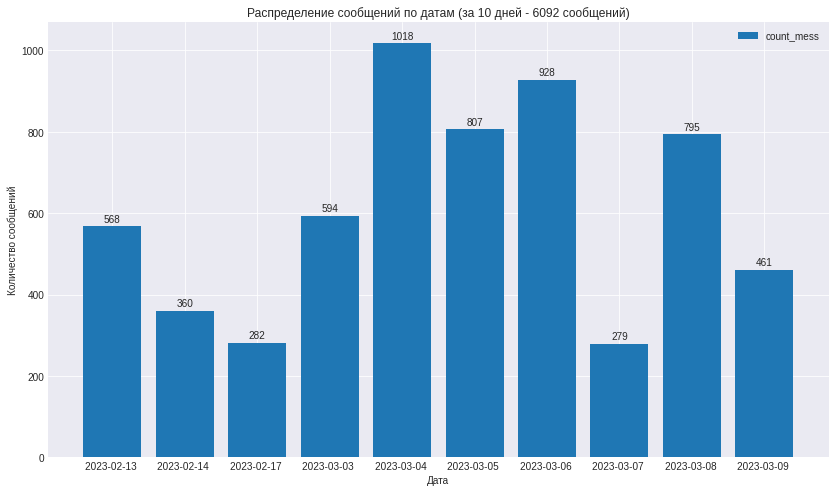

In [209]:
# vibo: data
plot_df = summary.groupby(['date'])['date'].count().to_frame(name='count_mess').reset_index()
groups_x = plot_df['date'].values
values_y = plot_df['count_mess'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x, values_y, label = "count_mess")

  for i, total in enumerate(values_y):
    ax.text(i, total + 10, values_y[i], ha='center')

  plt.title(f'Распределение сообщений по датам (за {len(groups_x)} дней - {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylabel('Количество сообщений')
  plt.show()

#### plt.style.available

In [210]:
# vibo: темы для оформления
for i in enumerate(plt.style.available):
  print(f'{i}')

(0, 'Solarize_Light2')
(1, '_classic_test_patch')
(2, '_mpl-gallery')
(3, '_mpl-gallery-nogrid')
(4, 'bmh')
(5, 'classic')
(6, 'dark_background')
(7, 'fast')
(8, 'fivethirtyeight')
(9, 'ggplot')
(10, 'grayscale')
(11, 'seaborn')
(12, 'seaborn-bright')
(13, 'seaborn-colorblind')
(14, 'seaborn-dark')
(15, 'seaborn-dark-palette')
(16, 'seaborn-darkgrid')
(17, 'seaborn-deep')
(18, 'seaborn-muted')
(19, 'seaborn-notebook')
(20, 'seaborn-paper')
(21, 'seaborn-pastel')
(22, 'seaborn-poster')
(23, 'seaborn-talk')
(24, 'seaborn-ticks')
(25, 'seaborn-white')
(26, 'seaborn-whitegrid')
(27, 'tableau-colorblind10')


In [211]:
# vibo: приведем данные, чтобы забрать день недели
example = summary.groupby(['date'])['date'].count().to_frame(name='count_mess').reset_index()
example = pd.to_datetime(example['date'])

example.dt.day_name()

0       Monday
1      Tuesday
2       Friday
3       Friday
4     Saturday
5       Sunday
6       Monday
7      Tuesday
8    Wednesday
9     Thursday
Name: date, dtype: object

### Категории сообщений

Сообщения сервера классифицируется следующим образом:
* `Async Chat Thread` - чат;
* `Server thread` - игровой процесс;
* `ServerMain` - системные сообщения;
* `User Authenticator` - индентификация пользователя;
* `Worker-Main` - процесс построения мира;
* `WorldGuard Region I/O` (исключили) - плагин WorldGuard.

In [212]:
sorted(list(summary['serv_teg_inf'].unique()))

['Async Chat Thread',
 'Server thread',
 'ServerMain',
 'User Authenticator',
 'Worker-Main']

Визуализируем распределение сообщений по дням с учетом их категорий. Преобразуем данные.

In [213]:
# vibo: преобразуем в датафрейм
plot_df = summary.groupby(['date', 'serv_teg_inf'])['date'].count().reset_index(name="count_mess")
# vibo: группируем без даты
plot_df = plot_df.groupby('serv_teg_inf').sum().reset_index().sort_values('count_mess', ascending=False).reset_index(drop=True)
# vibo: итоговое распределение
plot_df['%'] = plot_df['count_mess'] * 100 / plot_df['count_mess'].sum()
plot_df['%'] = plot_df['%'].round(2)
# vibo: % через div
# plot_df = plot_df.set_index('serv_teg_inf')
# plot_df = plot_df.div(plot_df['count_mess'].sum(axis=0)).reset_index()
plot_df

,serv_teg_inf,count_mess,%
0,Server thread,5003,82.12
1,Worker-Main,891,14.63
2,User Authenticator,93,1.53
3,ServerMain,86,1.41
4,Async Chat Thread,19,0.31


In [214]:
# vibo: понадобится для графиков
sort_labels = list(plot_df['serv_teg_inf'].values)
sort_labels

['Server thread',
 'Worker-Main',
 'User Authenticator',
 'ServerMain',
 'Async Chat Thread']

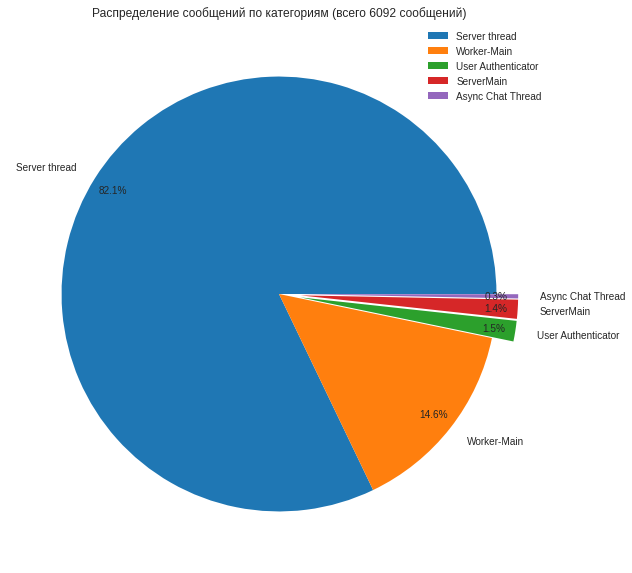

In [215]:
labels = plot_df['serv_teg_inf'].values
value = plot_df['count_mess'].values

# vibo: pie chart
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(10, 10))
  explode = [0, 0, 0.1, 0.1, 0.1]
  ax.pie(value, labels=labels, pctdistance=0.9, explode=explode, autopct='%1.1f%%', labeldistance=1.1)

  plt.title(f'Распределение сообщений по категориям (всего {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  plt.show()

Из графика видно, что большинство сообщений относятся к категории `Server thread` и `Worker-Main`.

In [216]:
# vibo: распределение сообщений по дням, группировка по типам
summary.groupby(['date', 'serv_teg_inf'])['date'].count()

date         serv_teg_inf      
2023-02-13   Server thread         414
             ServerMain             14
             User Authenticator      2
             Worker-Main           138
2023-02-14   Server thread         295
             ServerMain              6
             User Authenticator      1
             Worker-Main            58
2023-02-17   Async Chat Thread      12
             Server thread         233
             ServerMain              3
             User Authenticator      8
             Worker-Main            26
2023-03-03   Server thread         470
             ServerMain              9
             User Authenticator     11
             Worker-Main           104
2023-03-04   Async Chat Thread       1
             Server thread         845
             ServerMain             15
             User Authenticator      3
             Worker-Main           154
2023-03-05   Async Chat Thread       5
             Server thread         694
             ServerMain         

### Категории по дням

In [217]:
# vibo: развернули таблицу, сбросили индекс
plot_df = summary.groupby(['date', 'serv_teg_inf'])['date'].count().unstack('serv_teg_inf').reset_index()
# vibo: заменили пропуски на 0
plot_df = plot_df.fillna(0)
# vibo: перенесли столбец в индекс
plot_df = plot_df.set_index('date')
# vibo: sort_labels сдлеал выше, чтобы цвета сохранить для одной категории сообщения, ресетнули индекс
plot_df = plot_df[sort_labels].reset_index()
plot_df

serv_teg_inf,date,Server thread,Worker-Main,User Authenticator,ServerMain,Async Chat Thread
0,2023-02-13,414.0,138.0,2.0,14.0,0.0
1,2023-02-14,295.0,58.0,1.0,6.0,0.0
2,2023-02-17,233.0,26.0,8.0,3.0,12.0
3,2023-03-03,470.0,104.0,11.0,9.0,0.0
4,2023-03-04,845.0,154.0,3.0,15.0,1.0
5,2023-03-05,694.0,82.0,17.0,9.0,5.0
6,2023-03-06,781.0,111.0,24.0,12.0,0.0
7,2023-03-07,239.0,27.0,10.0,3.0,0.0
8,2023-03-08,668.0,107.0,10.0,9.0,1.0
9,2023-03-09,364.0,84.0,7.0,6.0,0.0


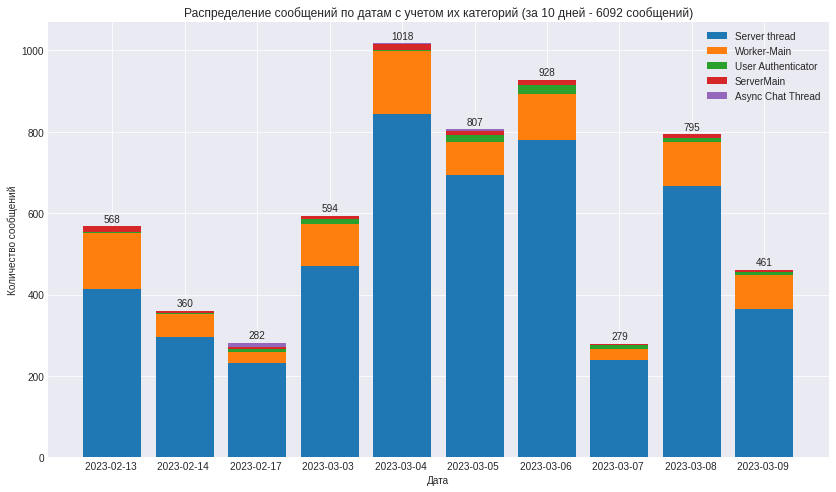

In [218]:
# vibo: data
groups_x = plot_df['date'].values

# vibo: stacked bar chart whith total value labels (matplotlib handmade)
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))

  __values = plot_df[sort_labels[0]].values.copy()
  ax.bar(groups_x, __values, label = sort_labels[0])
  
  for i in range(1, len(sort_labels)):      
    ax.bar(groups_x, plot_df[sort_labels[i]].values, label = sort_labels[i], bottom=__values)
    __values += plot_df[sort_labels[i]].values.copy()

  for i, total in enumerate(values_y):
    ax.text(i, total + 10, values_y[i], ha='center')

  plt.title(f'Распределение сообщений по датам с учетом их категорий (за {len(groups_x)} дней - {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylabel('Количество сообщений')
  plt.show()

При большем количестве дней наблюдений можно построить график загрузки от дней недели (усреднить значения). Еще у нас есть столбец время сообщения, можно строить более сложные графики с учетом этих данных.

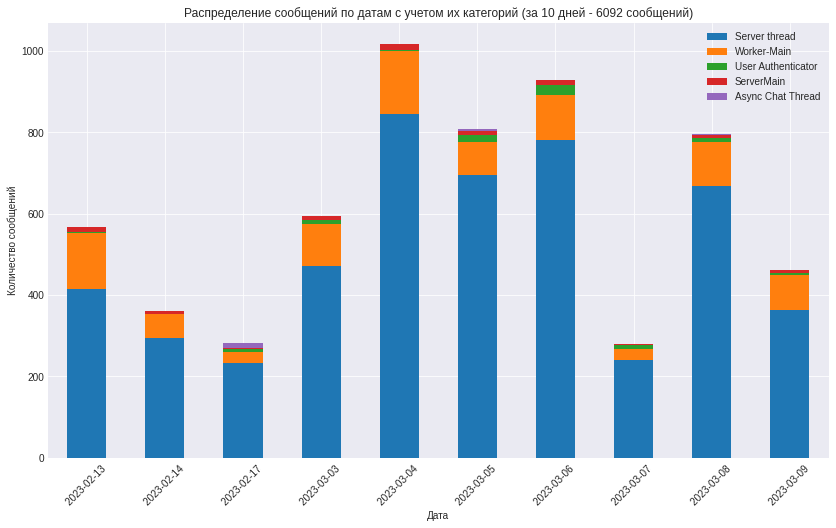

In [219]:
# vibo: stacked bar chart (pandas default -> plot_df.plot.bar)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  plot_df.plot.bar(x='date', stacked=True, figsize=(14, 8))

  plt.title(f'Распределение сообщений по датам с учетом их категорий (за {len(groups_x)} дней - {sum(values_y)} сообщений)')
  plt.legend(loc='best')
  plt.xlabel('Дата')
  plt.xticks(rotation = 45)
  plt.ylabel('Количество сообщений')
  plt.show()

### Типы сообщений

In [220]:
list(summary['serv_teg'].unique())

['INFO', 'ERROR', 'WARN']

In [221]:
# vibo: преобразуем в датафрейм
plot_df = summary.groupby(['date', 'serv_teg'])['date'].count().reset_index(name="count_mess")
# vibo: группируем без даты
plot_df = plot_df.groupby('serv_teg').sum().reset_index().sort_values('count_mess', ascending=False).reset_index(drop=True)
# vibo: итоговое распределение тегов
plot_df['%'] = plot_df['count_mess'] * 100 / plot_df['count_mess'].sum()
plot_df['%'] = plot_df['%'].round(2)
# vibo: % через div
# plot_df = plot_df.set_index('serv_teg')
# plot_df = plot_df.div(plot_df['count_mess'].sum(axis=0)).reset_index()
plot_df

,serv_teg,count_mess,%
0,INFO,5940,97.50
1,WARN,151,2.48
2,ERROR,1,0.02


In [222]:
# vibo: зададим сортировку для графиков
sort_labels = ['INFO', 'WARN', 'ERROR']

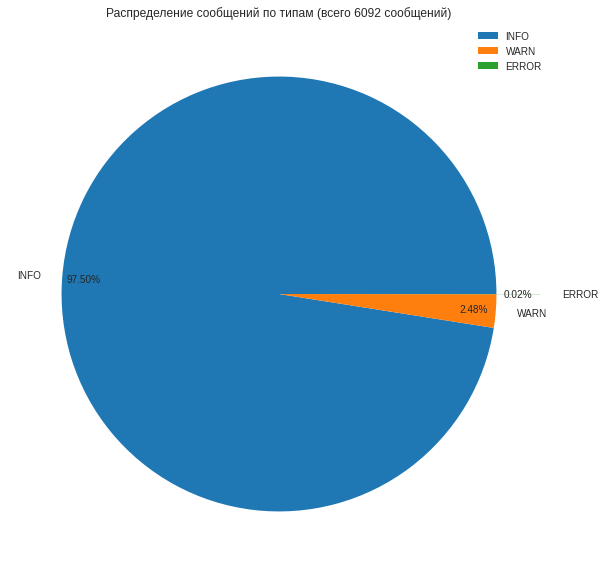

In [223]:
labels = plot_df['serv_teg'].values
value = plot_df['count_mess'].values

# vibo: pie chart
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(10, 10))
  explode = [0, 0, 0.2]
  ax.pie(value, labels=labels, pctdistance=0.9, explode=explode, autopct='%1.2f%%', labeldistance=1.1)

  plt.title(f'Распределение сообщений по типам (всего {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  plt.show()

Видим, что большинство сообщений носят тип `INFO`.

### Типы по дням

In [224]:
# vibo: развернули таблицу, сбросили индекс
plot_df = summary.groupby(['date', 'serv_teg'])['date'].count().unstack('serv_teg').reset_index()
plot_df = plot_df.fillna(0)
plot_df[['date', 'INFO', 'WARN', 'ERROR']]

serv_teg,date,INFO,WARN,ERROR
0,2023-02-13,557.0,10.0,1.0
1,2023-02-14,348.0,12.0,0.0
2,2023-02-17,277.0,5.0,0.0
3,2023-03-03,580.0,14.0,0.0
4,2023-03-04,994.0,24.0,0.0
5,2023-03-05,780.0,27.0,0.0
6,2023-03-06,905.0,23.0,0.0
7,2023-03-07,267.0,12.0,0.0
8,2023-03-08,781.0,14.0,0.0
9,2023-03-09,451.0,10.0,0.0


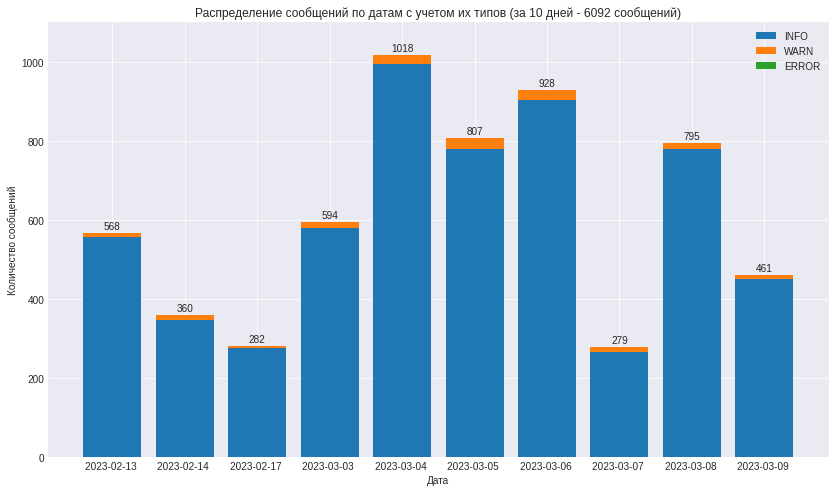

In [225]:
# vibo: data
groups_x = plot_df['date'].values

# vibo: stacked bar chart whith total value labels (matplotlib handmade)
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))

  __values = plot_df[sort_labels[0]].values.copy()
  ax.bar(groups_x, __values, label = sort_labels[0])
  
  for i in range(1, len(sort_labels)):      
    ax.bar(groups_x, plot_df[sort_labels[i]].values, label = sort_labels[i], bottom=__values)
    __values += plot_df[sort_labels[i]].values.copy()

  for i, total in enumerate(values_y):
    ax.text(i, total + 10, values_y[i], ha='center')

  plt.title(f'Распределение сообщений по датам с учетом их типов (за {len(groups_x)} дней - {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylim(0, 1100)
  ax.set_ylabel('Количество сообщений')
  plt.show()

Видим, что большинство сообщений носят тип `INFO`.

### Двойные группировки

#### Категория - Тип

Группируем информацию по дате и категориям сообщений (`Async Chat Thread`, `Server thread`, `ServerMain`, `User Authenticator`, `Worker-Main`). Смотрим на количество сообщений по типам (`ERROR`, `WARN`, `INFO`) для каждой категории по дням.

In [226]:
# vibo: получаем мультииндекс
plot_df = summary[['date', 'serv_teg_inf', 'serv_teg', 'serv_mess']].groupby(['date', 'serv_teg_inf', 'serv_teg'])['serv_mess'].count().to_frame()
plot_df

serv_mess
date        serv_teg_inf       serv_teg           
2023-02-13  Server thread      INFO            405
                               WARN              9
            ServerMain         ERROR             1
                               INFO             12
                               WARN              1
            User Authenticator INFO              2
            Worker-Main        INFO            138
2023-02-14  Server thread      INFO            283
                               WARN             12
            ServerMain         INFO              6
            User Authenticator INFO              1
            Worker-Main        INFO             58
2023-02-17  Async Chat Thread  INFO             12
            Server thread      INFO            228
                               WARN              5
            ServerMain         INFO              3
            User Authenticator INFO              8
            Worker-Main        INFO             26
2023-03-03  Server thread      INFO            456
                               WARN             14
            ServerMain         INFO              9
            User Authenticator INFO             11
            Worker-Main        INFO            104
2023-03-04  Async Chat Thread  INFO              1
            Server thread      INFO            821
                               WARN             24
            ServerMain         INFO             15
            User Authenticator INFO              3
            Worker-Main        INFO            154
2023-03-05  Async Chat Thread  INFO              5
            Server thread      INFO            667
                               WARN             27
            ServerMain         INFO              9
            User Authenticator INFO             17
            Worker-Main        INFO             82
2023-03-06  Server thread      INFO            758
                               WARN             23
            ServerMain         INFO             12
            User Authenticator INFO             24
            Worker-Main        INFO            111
2023-03-07  Server thread      INFO            227
                               WARN             12
            ServerMain         INFO              3
            User Authenticator INFO             10
            Worker-Main        INFO             27
2023-03-08  Async Chat Thread  INFO              1
            Server thread      INFO            654
                               WARN             14
            ServerMain         INFO              9
            User Authenticator INFO             10
            Worker-Main        INFO            107
2023-03-09  Server thread      INFO            354
                               WARN             10
            ServerMain         INFO              6
            User Authenticator INFO              7
            Worker-Main        INFO             84

Группировка по категориям сообщений (`Async Chat Thread`, `Server thread`, `ServerMain`, `User Authenticator`, `Worker-Main`). Смотрим на общее количество сообщений по типам (`ERROR`, `WARN`, `INFO`) для своей категории.

In [227]:
plot_df = summary[['serv_teg_inf', 'serv_teg', 'serv_mess']].groupby(['serv_teg_inf', 'serv_teg'])['serv_mess'].count().to_frame()
plot_df

serv_mess
serv_teg_inf       serv_teg           
Async Chat Thread  INFO             19
Server thread      INFO           4853
                   WARN            150
ServerMain         ERROR             1
                   INFO             84
                   WARN              1
User Authenticator INFO             93
Worker-Main        INFO            891

In [228]:
plot_df = plot_df.unstack('serv_teg').reset_index()
plot_df = plot_df.fillna(0)
plot_df

serv_teg_inf serv_mess               
serv_teg                         ERROR    INFO   WARN
0          Async Chat Thread       0.0    19.0    0.0
1              Server thread       0.0  4853.0  150.0
2                 ServerMain       1.0    84.0    1.0
3         User Authenticator       0.0    93.0    0.0
4                Worker-Main       0.0   891.0    0.0

In [229]:
# vibo: убираем мультииндекс
plot_df.columns = ['serv_teg_inf', 'ERROR', 'INFO', 'WARN']
plot_df

,serv_teg_inf,ERROR,INFO,WARN
0,Async Chat Thread,0.0,19.0,0.0
1,Server thread,0.0,4853.0,150.0
2,ServerMain,1.0,84.0,1.0
3,User Authenticator,0.0,93.0,0.0
4,Worker-Main,0.0,891.0,0.0


In [230]:
plot_df = plot_df[['serv_teg_inf', 'INFO', 'WARN', 'ERROR']]
plot_df['count_mess'] = plot_df[['INFO', 'WARN', 'ERROR']].sum(axis=1)
plot_df = plot_df.sort_values('count_mess', ascending=False).reset_index(drop=True)
plot_df

<ipython-input-230-c67a5287df4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['count_mess'] = plot_df[['INFO', 'WARN', 'ERROR']].sum(axis=1)


,serv_teg_inf,INFO,WARN,ERROR,count_mess
0,Server thread,4853.0,150.0,0.0,5003.0
1,Worker-Main,891.0,0.0,0.0,891.0
2,User Authenticator,93.0,0.0,0.0,93.0
3,ServerMain,84.0,1.0,1.0,86.0
4,Async Chat Thread,19.0,0.0,0.0,19.0


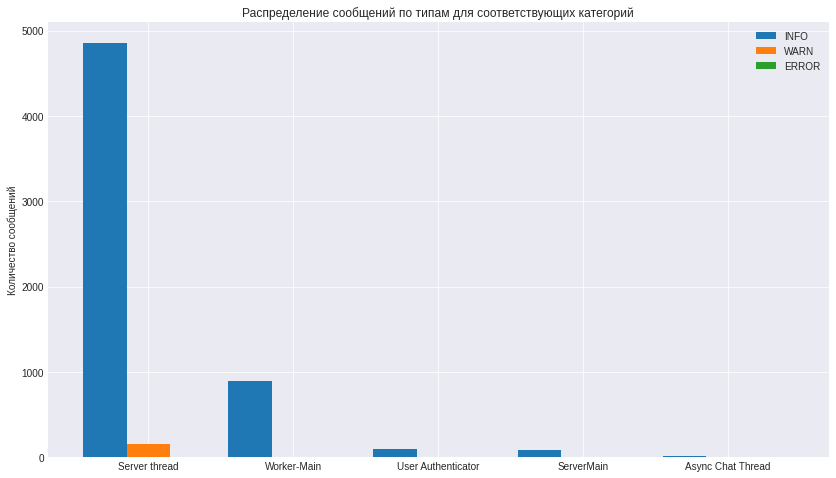

In [231]:
# vibo: data
groups_x = plot_df['serv_teg_inf']
g1 = plot_df['INFO'] 
g2 = plot_df['WARN']
g3 = plot_df['ERROR']

# vibo: bar chart for 3-groups (matplotlib handmade)
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):

  width = 0.3
  x = np.arange(len(groups_x))
  fig, ax = plt.subplots(figsize=(14, 8))

  rects1 = ax.bar(x - width, g1, width, label='INFO')
  rects2 = ax.bar(x, g2, width, label='WARN')
  rects3 = ax.bar(x + width, g3, width, label='ERROR')

  plt.title(f'Распределение сообщений по типам для соответствующих категорий')
  ax.legend(loc='best')
  ax.set_xticks(x)
  ax.set_xticklabels(groups_x)
  ax.set_ylabel('Количество сообщений')
  plt.show()

#### Тип - Категория

Теперь группируем информацию по дате и тапам сообщений (`ERROR`, `WARN`, `INFO`). Смотрим на количество сообщений по категориям (`Async Chat Thread`, `Server thread`, `ServerMain`, `User Authenticator`, `Worker-Main`) для каждого типа по дням.

In [232]:
plot_df = summary[['date', 'serv_teg_inf', 'serv_teg', 'serv_mess']].groupby(['date', 'serv_teg', 'serv_teg_inf'])['serv_mess'].count().to_frame()
plot_df

serv_mess
date        serv_teg serv_teg_inf                 
2023-02-13  ERROR    ServerMain                  1
            INFO     Server thread             405
                     ServerMain                 12
                     User Authenticator          2
                     Worker-Main               138
            WARN     Server thread               9
                     ServerMain                  1
2023-02-14  INFO     Server thread             283
                     ServerMain                  6
                     User Authenticator          1
                     Worker-Main                58
            WARN     Server thread              12
2023-02-17  INFO     Async Chat Thread          12
                     Server thread             228
                     ServerMain                  3
                     User Authenticator          8
                     Worker-Main                26
            WARN     Server thread               5
2023-03-03  INFO     Server thread             456
                     ServerMain                  9
                     User Authenticator         11
                     Worker-Main               104
            WARN     Server thread              14
2023-03-04  INFO     Async Chat Thread           1
                     Server thread             821
                     ServerMain                 15
                     User Authenticator          3
                     Worker-Main               154
            WARN     Server thread              24
2023-03-05  INFO     Async Chat Thread           5
                     Server thread             667
                     ServerMain                  9
                     User Authenticator         17
                     Worker-Main                82
            WARN     Server thread              27
2023-03-06  INFO     Server thread             758
                     ServerMain                 12
                     User Authenticator         24
                     Worker-Main               111
            WARN     Server thread              23
2023-03-07  INFO     Server thread             227
                     ServerMain                  3
                     User Authenticator         10
                     Worker-Main                27
            WARN     Server thread              12
2023-03-08  INFO     Async Chat Thread           1
                     Server thread             654
                     ServerMain                  9
                     User Authenticator         10
                     Worker-Main               107
            WARN     Server thread              14
2023-03-09  INFO     Server thread             354
                     ServerMain                  6
                     User Authenticator          7
                     Worker-Main                84
            WARN     Server thread              10

Группировка по о типам сообщений (`ERROR`, `WARN`, `INFO`). Смотрим на общее количество сообщений по категориям (`Async Chat Thread`, `Server thread`, `ServerMain`, `User Authenticator`, `Worker-Main`) для совего типа.

In [233]:
plot_df = summary[['serv_teg_inf', 'serv_teg', 'serv_mess']].groupby(['serv_teg', 'serv_teg_inf'])['serv_mess'].count().to_frame()
plot_df

serv_mess
serv_teg serv_teg_inf                 
ERROR    ServerMain                  1
INFO     Async Chat Thread          19
         Server thread            4853
         ServerMain                 84
         User Authenticator         93
         Worker-Main               891
WARN     Server thread             150
         ServerMain                  1

In [234]:
plot_df = plot_df.unstack('serv_teg_inf').reset_index()
plot_df = plot_df.fillna(0)
plot_df

serv_teg         serv_mess                           \
serv_teg_inf          Async Chat Thread Server thread ServerMain   
0               ERROR               0.0           0.0        1.0   
1                INFO              19.0        4853.0       84.0   
2                WARN               0.0         150.0        1.0   

                                             
serv_teg_inf User Authenticator Worker-Main  
0                           0.0         0.0  
1                          93.0       891.0  
2                           0.0         0.0

In [235]:
# vibo: убираем мультииндекс
plot_df.columns = ['serv_teg', 'Async Chat Thread', 'Server thread', 'ServerMain', 'User Authenticator', 'Worker-Main']
plot_df

,serv_teg,Async Chat Thread,Server thread,ServerMain,User Authenticator,Worker-Main
0,ERROR,0.0,0.0,1.0,0.0,0.0
1,INFO,19.0,4853.0,84.0,93.0,891.0
2,WARN,0.0,150.0,1.0,0.0,0.0


In [236]:
plot_df = plot_df[['serv_teg', 'Server thread', 'Worker-Main', 'User Authenticator', 'ServerMain', 'Async Chat Thread']]
plot_df['count_mess'] = plot_df[['serv_teg', 'Server thread', 'Worker-Main', 'User Authenticator', 'ServerMain', 'Async Chat Thread']].sum(axis=1)
plot_df = plot_df.sort_values('count_mess', ascending=False).reset_index(drop=True)
plot_df

<ipython-input-236-15823d17a44c>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plot_df['count_mess'] = plot_df[['serv_teg', 'Server thread', 'Worker-Main', 'User Authenticator', 'ServerMain', 'Async Chat Thread']].sum(axis=1)
<ipython-input-236-15823d17a44c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['count_mess'] = plot_df[['serv_teg', 'Server thread', 'Worker-Main', 'User Authenticator', 'ServerMain', 'Async Chat Thread']].sum(axis=1)


,serv_teg,Server thread,Worker-Main,User Authenticator,ServerMain,Async Chat Thread,count_mess
0,INFO,4853.0,891.0,93.0,84.0,19.0,5940.0
1,WARN,150.0,0.0,0.0,1.0,0.0,151.0
2,ERROR,0.0,0.0,0.0,1.0,0.0,1.0


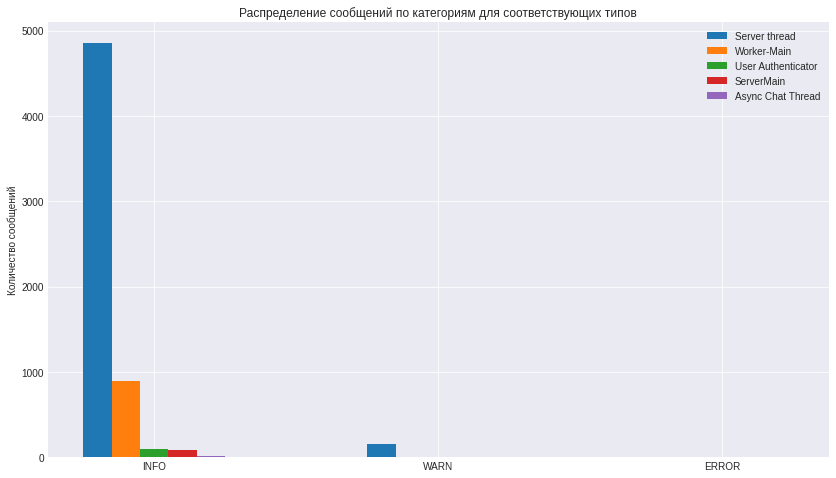

In [237]:
# vibo: data
groups_x = plot_df['serv_teg']
g1 = plot_df['Server thread'] 
g2 = plot_df['Worker-Main']
g3 = plot_df['User Authenticator']
g4 = plot_df['ServerMain']
g5 = plot_df['Async Chat Thread']

# vibo: bar chart for 5-groups (matplotlib handmade)
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):

  width = 0.1
  x = np.arange(len(groups_x))
  fig, ax = plt.subplots(figsize=(14, 8))

  rects1 = ax.bar(x - width*2, g1, width, label='Server thread')
  rects1 = ax.bar(x - width, g2, width, label='Worker-Main')
  rects3 = ax.bar(x, g3, width, label='User Authenticator')
  rects4 = ax.bar(x + width, g4, width, label='ServerMain')
  rects5 = ax.bar(x + width*2, g5, width, label='Async Chat Thread')

  plt.title(f'Распределение сообщений по категориям для соответствующих типов')
  ax.legend(loc='best')
  ax.set_xticks(x)
  ax.set_xticklabels(groups_x)
  ax.set_ylabel('Количество сообщений')
  plt.show()

### Ошибки на сервере

In [238]:
summary

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN


In [239]:
summary[summary['serv_teg'] == 'ERROR'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']]

,date,time,serv_teg_inf,serv_teg,serv_mess
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...


Ошибка была из-за неправильно заполненного основного конфигурационного файла сервера (server.properties). Бльше при запуске сервера я так не ошибался )

### Предупреждения на сервере

In [246]:
summary[summary['serv_teg'] == 'WARN'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']]

,date,time,serv_teg_inf,serv_teg,serv_mess
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt
248,2023-02-13,21:36:46,Server thread,WARN,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
249,2023-02-13,21:36:46,Server thread,WARN,The server will make no attempt to authentica...
250,2023-02-13,21:36:46,Server thread,WARN,While this makes the game possible to play wi...
251,2023-02-13,21:36:46,Server thread,WARN,"To change this, set ""online-mode"" to ""true"" i..."
...,...,...,...,...,...
6336,2023-03-09,17:56:12,Server thread,WARN,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
6337,2023-03-09,17:56:12,Server thread,WARN,The server will make no attempt to authentica...
6338,2023-03-09,17:56:12,Server thread,WARN,While this makes the game possible to play wi...
6339,2023-03-09,17:56:12,Server thread,WARN,"To change this, set ""online-mode"" to ""true"" i..."


In [247]:
summary[summary['serv_teg'] == 'WARN'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,151,151,151,151,151
unique,10,71,2,1,50
top,2023-03-05,20:43:44,Server thread,WARN,The server will make no attempt to authentica...
freq,27,4,150,151,26


Предупреждение в категории ServerMain

In [248]:
summary[(summary['serv_teg'] == 'WARN') & (summary['serv_teg_inf'] == 'ServerMain')][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']]

,date,time,serv_teg_inf,serv_teg,serv_mess
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt


Предупреждения в категории Server thread

In [249]:
summary[(summary['serv_teg'] == 'WARN') & (summary['serv_teg_inf'] == 'Server thread')][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']]

,date,time,serv_teg_inf,serv_teg,serv_mess
248,2023-02-13,21:36:46,Server thread,WARN,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
249,2023-02-13,21:36:46,Server thread,WARN,The server will make no attempt to authentica...
250,2023-02-13,21:36:46,Server thread,WARN,While this makes the game possible to play wi...
251,2023-02-13,21:36:46,Server thread,WARN,"To change this, set ""online-mode"" to ""true"" i..."
419,2023-02-13,21:59:41,Server thread,WARN,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
...,...,...,...,...,...
6336,2023-03-09,17:56:12,Server thread,WARN,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
6337,2023-03-09,17:56:12,Server thread,WARN,The server will make no attempt to authentica...
6338,2023-03-09,17:56:12,Server thread,WARN,While this makes the game possible to play wi...
6339,2023-03-09,17:56:12,Server thread,WARN,"To change this, set ""online-mode"" to ""true"" i..."


In [250]:
summary[(summary['serv_teg'] == 'WARN') & (summary['serv_teg_inf'] == 'Server thread')][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,150,150,150,150,150
unique,10,70,1,1,49
top,2023-03-05,21:36:46,Server thread,WARN,**** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!
freq,27,4,150,150,26


In [ ]:
# vibo: сгруппируем предупреждения по их частоте появления, выведем топ
summary[(summary['serv_teg'] == 'WARN') & (summary['serv_teg_inf'] == 'Server thread')]['serv_mess'].value_counts().head(6)

 **** SERVER IS RUNNING IN OFFLINE/INSECURE MODE!                                                                                                          26
 While this makes the game possible to play without internet access, it also opens up the ability for hackers to connect with any username they choose.    26
 To change this, set "online-mode" to "true" in the server.properties file.                                                                                26
 The server will make no attempt to authenticate usernames. Beware.                                                                                        26
 handleDisconnection() called twice                                                                                                                         2
 Can't keep up! Is the server overloaded? Running 5096ms or 101 ticks behind                                                                                1
Name: serv_mess, dtype: int64

#### overloaded

In [270]:
df_is_serv_over = summary['serv_mess'].map(lambda x: "Can't keep up! Is the server overloaded?" in x).to_frame(name='is_serv_over')
ind_is_serv_over = df_is_serv_over[df_is_serv_over['is_serv_over'] == True].index
plot_df = summary[summary.index.isin(ind_is_serv_over)][['date', 'time', 'serv_mess']]
plot_df

,date,time,serv_mess
569,2023-02-13,22:02:02,Can't keep up! Is the server overloaded? Runn...
917,2023-02-14,23:54:09,Can't keep up! Is the server overloaded? Runn...
1098,2023-02-17,19:05:53,Can't keep up! Is the server overloaded? Runn...
1392,2023-03-03,18:05:52,Can't keep up! Is the server overloaded? Runn...
1988,2023-03-04,18:10:37,Can't keep up! Is the server overloaded? Runn...
2687,2023-03-04,20:48:01,Can't keep up! Is the server overloaded? Runn...
2691,2023-03-04,21:00:39,Can't keep up! Is the server overloaded? Runn...
3013,2023-03-05,11:47:49,Can't keep up! Is the server overloaded? Runn...
3204,2023-03-05,13:13:03,Can't keep up! Is the server overloaded? Runn...
3237,2023-03-05,14:21:22,Can't keep up! Is the server overloaded? Runn...


Выделим время запуска в сообщении с предупреждением (время в милисекундах, ms)

In [271]:
plot_df['running_time'] = plot_df['serv_mess'].map(lambda x: x.split()[8][:-2])
plot_df

,date,time,serv_mess,running_time
569,2023-02-13,22:02:02,Can't keep up! Is the server overloaded? Runn...,5152
917,2023-02-14,23:54:09,Can't keep up! Is the server overloaded? Runn...,5101
1098,2023-02-17,19:05:53,Can't keep up! Is the server overloaded? Runn...,5158
1392,2023-03-03,18:05:52,Can't keep up! Is the server overloaded? Runn...,5147
1988,2023-03-04,18:10:37,Can't keep up! Is the server overloaded? Runn...,5086
2687,2023-03-04,20:48:01,Can't keep up! Is the server overloaded? Runn...,5308
2691,2023-03-04,21:00:39,Can't keep up! Is the server overloaded? Runn...,5251
3013,2023-03-05,11:47:49,Can't keep up! Is the server overloaded? Runn...,5173
3204,2023-03-05,13:13:03,Can't keep up! Is the server overloaded? Runn...,5207
3237,2023-03-05,14:21:22,Can't keep up! Is the server overloaded? Runn...,5405


In [278]:
# vibo: приведем новый столбец к int
plot_df['running_time'] = plot_df['running_time'].astype(int)

In [279]:
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 569 to 6550
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          32 non-null     object
 1   time          32 non-null     object
 2   serv_mess     32 non-null     object
 3   running_time  32 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


In [280]:
plot_df['running_time'].describe()

count       32.000000
mean      6071.312500
std       3324.376657
min       5003.000000
25%       5102.750000
50%       5229.000000
75%       5625.000000
max      23885.000000
Name: running_time, dtype: float64

In [281]:
med_running = plot_df['running_time'].describe()['50%']
med_running

5229.0

In [282]:
plot_df[['date', 'running_time']].groupby(['date'])['running_time'].agg('mean')

date
2023-02-13     5152.000000
2023-02-14     5101.000000
2023-02-17     5158.000000
2023-03-03     5147.000000
2023-03-04     5215.000000
2023-03-05     6002.900000
2023-03-06     8326.833333
2023-03-07     5313.000000
2023-03-08     5535.000000
2023-03-09     5338.000000
Name: running_time, dtype: float64

In [283]:
plot_df = plot_df[['date', 'running_time']].groupby(['date'])['running_time'].agg('median').to_frame(name='running_time_median').reset_index()
plot_df

,date,running_time_median
0,2023-02-13,5152.0
1,2023-02-14,5101.0
2,2023-02-17,5158.0
3,2023-03-03,5147.0
4,2023-03-04,5251.0
5,2023-03-05,5704.5
6,2023-03-06,5118.0
7,2023-03-07,5275.5
8,2023-03-08,5535.0
9,2023-03-09,5338.0


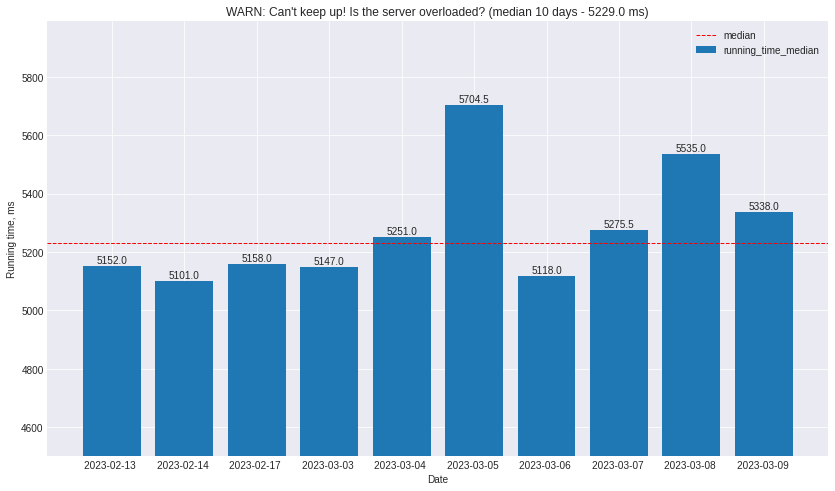

In [293]:
# vibo: data
groups_x = plot_df['date'].values
values_y = plot_df['running_time_median'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x, values_y, label = "running_time_median")

  plt.axhline(y=med_running, color='red', linestyle='--', linewidth=1, label='median')

  for i, total in enumerate(values_y):
    ax.text(i, total + 10, round(values_y[i], 2), ha='center')

  plt.title(f"WARN: Can't keep up! Is the server overloaded? (median {len(groups_x)} days - {med_running} ms)")
  ax.legend(loc='best')
  ax.set_xlabel('Date')
  ax.set_ylim(4500)
  ax.set_ylabel('Running time, ms')
  plt.show()

Предупреждение выдается, когда время запуска превышает 5000 милисекунд.

#### handleDisconnection

In [262]:
df_handle_discon = summary['serv_mess'].map(lambda x: "handleDisconnection" in x).to_frame(name='handle_discon')
ind_handle_discon = df_handle_discon[df_handle_discon['handle_discon'] == True].index
summary[summary.index.isin(ind_handle_discon)]

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
2835,2023-03-04,21:15:02,Server thread,WARN,handleDisconnection() called twice,NaN,NaN,NaN
5637,2023-03-08,16:58:26,Server thread,WARN,handleDisconnection() called twice,NaN,NaN,NaN


Теперь перейдем в выделению информации из дополнительно текстового сообщения сервера в столбце `serv_mess`, перед следующим этапом сохраним логи

## Разбор сообщений

Раздел назван дополнительные сообщения сервера, но на самом деле здесь более интересная информация. Смотрим на столбец `serv_mess`

In [397]:
# vibo: читаем предобработанный лог (index_col=0 считываем индексы тоже)
data_logs = pd.read_csv('/content/drive/MyDrive/minecraft/logs.csv', index_col=0)

In [398]:
data_logs

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN,NaN,NaN


In [399]:
# vibo: сводная статистика
data_logs[['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess', 'plug_name', 'plug_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess,plug_name,plug_mess
count,6544,6544,6544,6544,6092,452,441
unique,10,1306,6,3,913,3,50
top,2023-03-06,21:13:39,Server thread,INFO,Preparing spawn area: 0%,WorldEdit,
freq,1093,115,5444,6392,674,218,44


Делаем новый датафрейм с которым будем работать

In [400]:
summary = data_logs[['date',	'time', 'serv_teg_inf', 'serv_teg', 'serv_mess', 'user_authenticator_number', 'worker_main_number', 'async_chat_thread_number']]
summary

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN


In [401]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6544 entries, 0 to 6581
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       6544 non-null   object 
 1   time                       6544 non-null   object 
 2   serv_teg_inf               6544 non-null   object 
 3   serv_teg                   6544 non-null   object 
 4   serv_mess                  6092 non-null   object 
 5   user_authenticator_number  93 non-null     float64
 6   worker_main_number         891 non-null    float64
 7   async_chat_thread_number   19 non-null     float64
dtypes: float64(3), object(5)
memory usage: 460.1+ KB


In [402]:
# vibo: удаляем лишнее как и в блоке с анализом основных сообщений сервера
summary = summary[summary['serv_teg_inf'] != 'WorldGuard Region I/O']
# vibo: ищем не нулевые строки
find_index = summary['serv_mess'].dropna().index
# vibo: фильтруем по ним датафрейм
summary = summary[summary.index.isin(find_index)]
summary

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN


In [403]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6092 entries, 0 to 6581
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       6092 non-null   object 
 1   time                       6092 non-null   object 
 2   serv_teg_inf               6092 non-null   object 
 3   serv_teg                   6092 non-null   object 
 4   serv_mess                  6092 non-null   object 
 5   user_authenticator_number  93 non-null     float64
 6   worker_main_number         891 non-null    float64
 7   async_chat_thread_number   19 non-null     float64
dtypes: float64(3), object(5)
memory usage: 428.3+ KB


In [404]:
summary[['date', 'time', 'serv_teg_inf', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_mess
count,6092,6092,6092,6092
unique,10,1285,5,913
top,2023-03-04,21:13:39,Server thread,Preparing spawn area: 0%
freq,1018,115,5003,674


### **Server thread**

Смотрим на сообщения в категории `Server thread`

In [405]:
summary[summary['serv_teg_inf'] == 'Server thread']

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2,NaN,NaN,NaN
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties,NaN,NaN,NaN
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...,NaN,NaN,NaN
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled,NaN,NaN,NaN
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game,NaN,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN


In [406]:
summary[summary['serv_teg_inf'] == 'Server thread'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 9 to 6581
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       5003 non-null   object 
 1   time                       5003 non-null   object 
 2   serv_teg_inf               5003 non-null   object 
 3   serv_teg                   5003 non-null   object 
 4   serv_mess                  5003 non-null   object 
 5   user_authenticator_number  0 non-null      float64
 6   worker_main_number         0 non-null      float64
 7   async_chat_thread_number   0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 351.8+ KB


Видно, что последние три столбца из рассмотрения можно сразу исключить, выделим данные в отдельный датафрейм



In [407]:
sub_summary = summary[summary['serv_teg_inf'] == 'Server thread'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']]
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12
...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand


In [408]:
sub_summary[sub_summary['serv_teg_inf'] == 'Server thread'].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,5003,5003,5003,5003,5003
unique,10,1028,1,2,782
top,2023-03-04,21:13:39,Server thread,INFO,Custom Map Seeds: Village: 10387312 Desert: ...
freq,845,115,5003,4853,84


Самые популярные сообщения в категории `Server thread`

In [409]:
# vibo: найдем самые популярные сообщения в категории
summary[summary['serv_teg_inf'] == 'Server thread']['serv_mess'].value_counts()

 Custom Map Seeds:  Village: 10387312 Desert: 14357617 Igloo: 14357618 Jungle: 14357619 Swamp: 14357620 Monument: 10387313 Ocean: 14357621 Shipwreck: 165745295 End City: 10387313 Slime: 987234911 Nether: 30084232 Mansion: 10387319 Fossil: 14357921 Portal: 34222645    84
 Nerfing mobs spawned from spawners: false                                                                                                                                                                                                                                  84
 Sapling Growth Modifier: 100%                                                                                                                                                                                                                                              84
 Beetroot Growth Modifier: 100%                                                                                                                                                            

#### Количество запусков сервера по дням

Посмотрим, что из себя представляют сообщения в этой категории. Начинаются они с сообщения о том, что сервер стартует. Надем их. Найдем количество запусков сервера, распределение запусков по дням.

In [410]:
df_is_start = sub_summary['serv_mess'].map(lambda x: 'Starting minecraft server' in x).to_frame(name='is_start')
ind_is_start = df_is_start[df_is_start['is_start'] == True].index
len(ind_is_start)

27

In [411]:
plot_df = sub_summary[sub_summary.index.isin(ind_is_start)][['date', 'serv_mess']].groupby(['date']).count().reset_index()
plot_df['%'] = plot_df['serv_mess'] * 100 / plot_df['serv_mess'].sum()
plot_df['%'] = plot_df['%'].round(2)
plot_df

,date,serv_mess,%
0,2023-02-13,3,11.11
1,2023-02-14,2,7.41
2,2023-02-17,1,3.70
3,2023-03-03,3,11.11
4,2023-03-04,5,18.52
5,2023-03-05,3,11.11
6,2023-03-06,4,14.81
7,2023-03-07,1,3.70
8,2023-03-08,3,11.11
9,2023-03-09,2,7.41


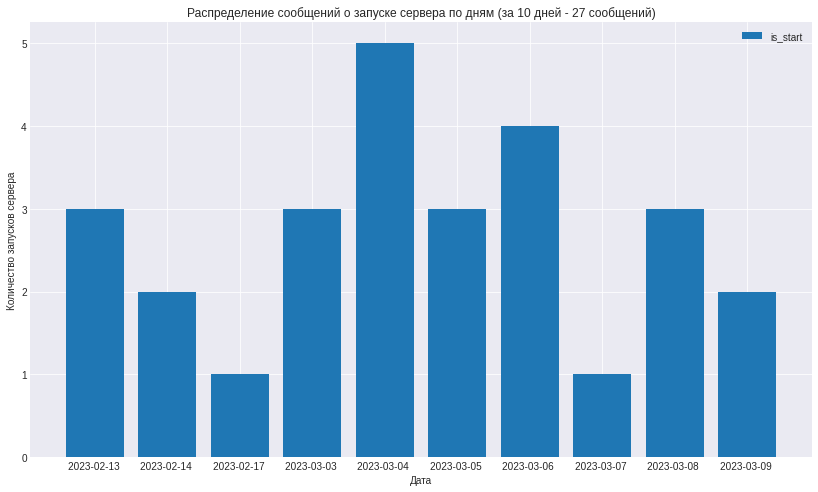

In [412]:
# vibo: data
groups_x = plot_df['date'].values
values_y = plot_df['serv_mess'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x, values_y, label = "is_start")

  # for i, total in enumerate(values_y):
  #   ax.text(i, total + 0.1, values_y[i], ha='center')

  plt.title(f'Распределение сообщений о запуске сервера по дням (за {len(groups_x)} дней - {sum(values_y)} сообщений)')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylabel('Количество запусков сервера')
  plt.show()

После начала запуска сервера идет блок сообщений о загрузке свойств: World Settings For [world], World Settings For [world_nether],  World Settings For [world_the_end]. Этот блок заканчивается сообщением 'Done'. Найдем их.

In [413]:
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12
...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand


In [414]:
df_done = sub_summary['serv_mess'].map(lambda x: 'Done' in x).to_frame(name='done')
ind_done = df_done[df_done['done'] == True].index
len(ind_done)

27

In [415]:
ind_done

Int64Index([ 222,  392,  565,  739,  913, 1094, 1380, 1587, 1818, 1984, 2188,
            2364, 2525, 2686, 3009, 3179, 3492, 3861, 4244, 4502, 4735, 4977,
            5310, 5608, 6026, 6233, 6531],
           dtype='int64')

In [416]:
plot_df = sub_summary[sub_summary.index.isin(ind_done)]
plot_df

,date,time,serv_teg_inf,serv_teg,serv_mess
222,2023-02-13,21:35:13,Server thread,INFO,"Done (66.075s)! For help, type ""help"""
392,2023-02-13,21:36:58,Server thread,INFO,"Done (12.374s)! For help, type ""help"""
565,2023-02-13,21:59:54,Server thread,INFO,"Done (12.742s)! For help, type ""help"""
739,2023-02-14,20:46:06,Server thread,INFO,"Done (15.752s)! For help, type ""help"""
913,2023-02-14,23:48:28,Server thread,INFO,"Done (13.669s)! For help, type ""help"""
1094,2023-02-17,19:00:13,Server thread,INFO,"Done (13.316s)! For help, type ""help"""
1380,2023-03-03,17:56:41,Server thread,INFO,"Done (14.476s)! For help, type ""help"""
1587,2023-03-03,18:28:37,Server thread,INFO,"Done (24.331s)! For help, type ""help"""
1818,2023-03-03,19:57:41,Server thread,INFO,"Done (13.917s)! For help, type ""help"""
1984,2023-03-04,18:08:49,Server thread,INFO,"Done (13.452s)! For help, type ""help"""


#### Время запуска сервера

Выделим информацию о времени запуска сервера в секундах, самый первый запуск был самым продолжительным

In [417]:
plot_df['starting_time'] = plot_df['serv_mess'].map(lambda x: x.split()[1][1:-3])
plot_df

<ipython-input-417-0856d07569a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['starting_time'] = plot_df['serv_mess'].map(lambda x: x.split()[1][1:-3])


,date,time,serv_teg_inf,serv_teg,serv_mess,starting_time
222,2023-02-13,21:35:13,Server thread,INFO,"Done (66.075s)! For help, type ""help""",66.075
392,2023-02-13,21:36:58,Server thread,INFO,"Done (12.374s)! For help, type ""help""",12.374
565,2023-02-13,21:59:54,Server thread,INFO,"Done (12.742s)! For help, type ""help""",12.742
739,2023-02-14,20:46:06,Server thread,INFO,"Done (15.752s)! For help, type ""help""",15.752
913,2023-02-14,23:48:28,Server thread,INFO,"Done (13.669s)! For help, type ""help""",13.669
1094,2023-02-17,19:00:13,Server thread,INFO,"Done (13.316s)! For help, type ""help""",13.316
1380,2023-03-03,17:56:41,Server thread,INFO,"Done (14.476s)! For help, type ""help""",14.476
1587,2023-03-03,18:28:37,Server thread,INFO,"Done (24.331s)! For help, type ""help""",24.331
1818,2023-03-03,19:57:41,Server thread,INFO,"Done (13.917s)! For help, type ""help""",13.917
1984,2023-03-04,18:08:49,Server thread,INFO,"Done (13.452s)! For help, type ""help""",13.452


In [418]:
# vibo: приведем новый столбец к float
plot_df['starting_time'] = plot_df['starting_time'].astype(float)

<ipython-input-418-e8458d34d553>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['starting_time'] = plot_df['starting_time'].astype(float)


In [419]:
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 222 to 6531
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           27 non-null     object 
 1   time           27 non-null     object 
 2   serv_teg_inf   27 non-null     object 
 3   serv_teg       27 non-null     object 
 4   serv_mess      27 non-null     object 
 5   starting_time  27 non-null     float64
dtypes: float64(1), object(5)
memory usage: 1.5+ KB


Из таблицы ниже видим среднее время запуска сервера, минимальное, максимальное, и др. статистические показатели

In [420]:
plot_df['starting_time'].describe()

count    27.000000
mean     18.072667
std      10.680711
min      12.374000
25%      13.724000
50%      14.604000
75%      15.552500
max      66.075000
Name: starting_time, dtype: float64

In [421]:
med_starting = plot_df['starting_time'].describe()['50%']
med_starting

14.604

In [422]:
plot_df[['date', 'starting_time']].groupby(['date'])['starting_time'].agg('mean')

date
2023-02-13     30.397000
2023-02-14     14.710500
2023-02-17     13.316000
2023-03-03     17.574667
2023-03-04     15.666200
2023-03-05     14.083000
2023-03-06     15.032250
2023-03-07     14.483000
2023-03-08     19.753000
2023-03-09     23.429500
Name: starting_time, dtype: float64

Для визуализиции результатов по времени запуска будем использовать медианные значения. 

In [423]:
plot_df = plot_df[['date', 'starting_time']].groupby(['date'])['starting_time'].agg('median').to_frame(name='time_starting_median').reset_index()
plot_df

,date,time_starting_median
0,2023-02-13,12.7420
1,2023-02-14,14.7105
2,2023-02-17,13.3160
3,2023-03-03,14.4760
4,2023-03-04,13.4520
5,2023-03-05,14.2170
6,2023-03-06,15.0560
7,2023-03-07,14.4830
8,2023-03-08,19.2000
9,2023-03-09,23.4295


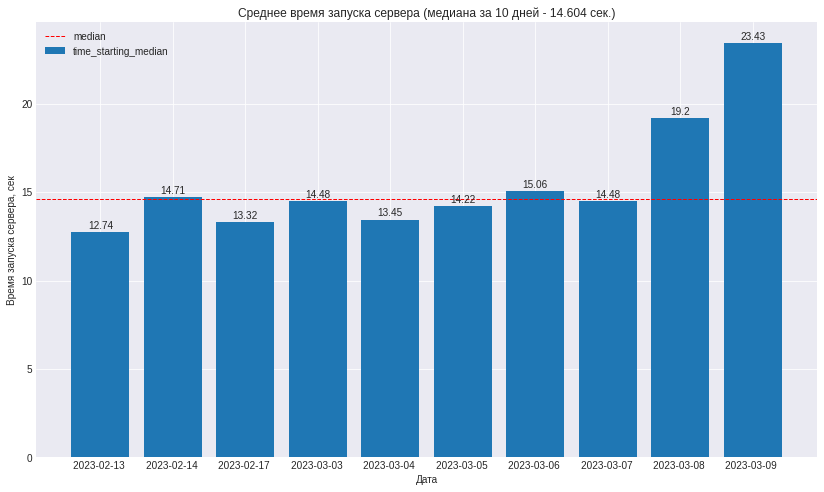

In [424]:
# vibo: data
groups_x = plot_df['date'].values
values_y = plot_df['time_starting_median'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x, values_y, label = "time_starting_median")

  plt.axhline(y=med_starting, color='red', linestyle='--', linewidth=1, label='median')

  for i, total in enumerate(values_y):
    ax.text(i, total + 0.2, round(values_y[i], 2), ha='center')

  plt.title(f'Среднее время запуска сервера (медиана за {len(groups_x)} дней - {med_starting} сек.)')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylabel('Время запуска сервера, сек')
  plt.show()

Из графика видим, что среднее время запуска сервера увиличилось в последние дни, предполагаю, что это связано с установкой дополнительных плагинов.

#### Остановка сервера

С остановками сервера более интересно. Корректная остановка работы сервера осуществляется из консоли сервера или из консоли игрока с правом доступа (op) командой `stop`. Это штатный режим завершения работы за которым идет сохранение параметров сервера.

Найдем когда сервер останавливался. Остановка сервера начинается с сообщения "Stopping the server"

In [425]:
df_is_stop = sub_summary['serv_mess'].map(lambda x: 'Stopping the server' in x).to_frame(name='is_stop')
ind_is_stop = df_is_stop[df_is_stop['is_stop'] == True].index
len(ind_is_stop)

11

Число запусков было другое

In [426]:
len(ind_is_start)

27

In [427]:
plot_df = sub_summary[sub_summary.index.isin(ind_is_stop)][['date', 'serv_mess']].groupby(['date']).count().reset_index()
plot_df['%'] = plot_df['serv_mess'] * 100 / plot_df['serv_mess'].sum()
plot_df['%'] = plot_df['%'].round(2)
plot_df

,date,serv_mess,%
0,2023-02-13,1,9.09
1,2023-02-14,2,18.18
2,2023-02-17,1,9.09
3,2023-03-03,2,18.18
4,2023-03-04,1,9.09
5,2023-03-06,3,27.27
6,2023-03-09,1,9.09


Найдем сообщения об успешном сохранении параметров сервера

In [428]:
df_save_is_ok = sub_summary['serv_mess'].map(lambda x: 'All dimensions are saved' in x).to_frame(name='save_is_ok')
ind_save_is_ok = df_save_is_ok[df_save_is_ok['save_is_ok'] == True].index
len(ind_save_is_ok)

11

Дальше нужно переходить к показателю дата + время, т.к. сервер мог быть запущен в 23:50, а остановлен в 00:15 уже следующего дня.

#### Игроки на сервере

Когда игрок появляется на сервере это фиксируется соответствующим сообщением (join)

In [432]:
sub_summary['is_user_join'] = sub_summary['serv_mess'].map(lambda x: 'join' in x)
ind_user_join = sub_summary[sub_summary['is_user_join'] == True].index
len(ind_user_join)

88

In [433]:
sub_summary[sub_summary.index.isin(ind_user_join)]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join
394,2023-02-13,21:49:48,Server thread,INFO,vibO joined the game,True
567,2023-02-13,22:01:25,Server thread,INFO,vibO joined the game,True
915,2023-02-14,23:53:33,Server thread,INFO,vibO joined the game,True
1096,2023-02-17,19:05:26,Server thread,INFO,YOUTUBE_plaY joined the game,True
1102,2023-02-17,19:07:53,Server thread,INFO,YOUTUBE_plaY joined the game,True
...,...,...,...,...,...,...
6536,2023-03-09,17:58:28,Server thread,INFO,ARTEXX joined the game,True
6541,2023-03-09,18:01:54,Server thread,INFO,ARTEEXX joined the game,True
6547,2023-03-09,18:04:00,Server thread,INFO,AARRTTEEXX joined the game,True
6554,2023-03-09,18:16:03,Server thread,INFO,ARTEXX joined the game,True


Когда игрок покидает сервере это фиксируется соответствующим сообщением (left)

In [434]:
sub_summary['is_user_left'] = sub_summary['serv_mess'].map(lambda x: 'left' in x)
ind_user_left = sub_summary[sub_summary['is_user_left'] == True].index
len(ind_user_left)

83

Уже интересно, т.к. количество снова не совпадает

In [435]:
sub_summary[sub_summary.index.isin(ind_user_left)]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left
404,2023-02-13,21:57:51,Server thread,INFO,vibO left the game,False,True
573,2023-02-14,00:15:19,Server thread,INFO,vibO left the game,False,True
925,2023-02-14,23:58:51,Server thread,INFO,vibO left the game.,False,True
1100,2023-02-17,19:07:04,Server thread,INFO,YOUTUBE_plaY left the game,False,True
1132,2023-02-17,19:34:51,Server thread,INFO,vibo left the game,False,True
...,...,...,...,...,...,...,...
6281,2023-03-09,21:25:30,Server thread,INFO,_Rocket5500_ left the game,False,True
6539,2023-03-09,17:59:49,Server thread,INFO,ARTEXX left the game,False,True
6545,2023-03-09,18:02:56,Server thread,INFO,ARTEEXX left the game,False,True
6552,2023-03-09,18:04:34,Server thread,INFO,AARRTTEEXX left the game,False,True


С покиданием сервера все тоже не так просто. Перед тем как игрок покидает игру в логах есть сообщение 'lost connection', которое имеет свое пояснение. Посмотрим не эти сообщения.

In [436]:
sub_summary['is_lost_connection'] = sub_summary['serv_mess'].map(lambda x: 'lost connection' in x)
ind_lost_connection = sub_summary[sub_summary['is_lost_connection'] == True].index
len(ind_lost_connection)

83

In [437]:
sub_summary[sub_summary.index.isin(ind_lost_connection)]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_lost_connection
403,2023-02-13,21:57:51,Server thread,INFO,vibO lost connection: Disconnected,False,False,True
572,2023-02-14,00:15:19,Server thread,INFO,vibO lost connection: Disconnected,False,False,True
924,2023-02-14,23:58:51,Server thread,INFO,vibO lost connection: Server closed,False,False,True
1099,2023-02-17,19:07:04,Server thread,INFO,YOUTUBE_plaY lost connection: Disconnected,False,False,True
1131,2023-02-17,19:34:51,Server thread,INFO,vibo lost connection: Disconnected,False,False,True
...,...,...,...,...,...,...,...,...
6280,2023-03-09,21:25:30,Server thread,INFO,_Rocket5500_ lost connection: Disconnected,False,False,True
6538,2023-03-09,17:59:49,Server thread,INFO,ARTEXX lost connection: Disconnected,False,False,True
6544,2023-03-09,18:02:55,Server thread,INFO,ARTEEXX lost connection: Disconnected,False,False,True
6551,2023-03-09,18:04:34,Server thread,INFO,AARRTTEEXX lost connection: Disconnected,False,False,True


Вынесем в один столбец причину по которой игрок покинул сервер

In [447]:
sub_summary['reason_lost_connection'] = sub_summary[sub_summary.index.isin(ind_lost_connection)]['serv_mess'].map(lambda x: ' '.join(x.split()[3:]))
sub_summary[sub_summary['is_lost_connection'] == True]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_lost_connection,reason_lost_connection
403,2023-02-13,21:57:51,Server thread,INFO,vibO lost connection: Disconnected,False,False,True,Disconnected
572,2023-02-14,00:15:19,Server thread,INFO,vibO lost connection: Disconnected,False,False,True,Disconnected
924,2023-02-14,23:58:51,Server thread,INFO,vibO lost connection: Server closed,False,False,True,Server closed
1099,2023-02-17,19:07:04,Server thread,INFO,YOUTUBE_plaY lost connection: Disconnected,False,False,True,Disconnected
1131,2023-02-17,19:34:51,Server thread,INFO,vibo lost connection: Disconnected,False,False,True,Disconnected
...,...,...,...,...,...,...,...,...,...
6280,2023-03-09,21:25:30,Server thread,INFO,_Rocket5500_ lost connection: Disconnected,False,False,True,Disconnected
6538,2023-03-09,17:59:49,Server thread,INFO,ARTEXX lost connection: Disconnected,False,False,True,Disconnected
6544,2023-03-09,18:02:55,Server thread,INFO,ARTEEXX lost connection: Disconnected,False,False,True,Disconnected
6551,2023-03-09,18:04:34,Server thread,INFO,AARRTTEEXX lost connection: Disconnected,False,False,True,Disconnected


In [444]:
sub_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 9 to 6581
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    5003 non-null   datetime64[ns]
 1   time                    5003 non-null   object        
 2   serv_teg_inf            5003 non-null   object        
 3   serv_teg                5003 non-null   object        
 4   serv_mess               5003 non-null   object        
 5   is_user_join            5003 non-null   bool          
 6   is_user_left            5003 non-null   bool          
 7   is_lost_connection      5003 non-null   bool          
 8   reason_lost_connection  83 non-null     object        
dtypes: bool(3), datetime64[ns](1), object(5)
memory usage: 288.3+ KB


In [450]:
sub_summary['reason_lost_connection'].describe()

count               83
unique               5
top       Disconnected
freq                72
Name: reason_lost_connection, dtype: object

In [476]:
plot_df = sub_summary[sub_summary['is_lost_connection'] == True][['reason_lost_connection', 'is_lost_connection']].groupby(['reason_lost_connection']).count().reset_index()
plot_df['%'] = plot_df['is_lost_connection'] * 100 / plot_df['is_lost_connection'].sum()
plot_df['%'] = plot_df['%'].round(2)
plot_df = plot_df.sort_values('is_lost_connection', ascending=False)
plot_df

,reason_lost_connection,is_lost_connection,%
0,Disconnected,72,86.75
1,Server closed,4,4.82
4,You logged in from another location,4,4.82
2,You are banned from this server,2,2.41
3,You dropped your items too quickly (Hacking?),1,1.20


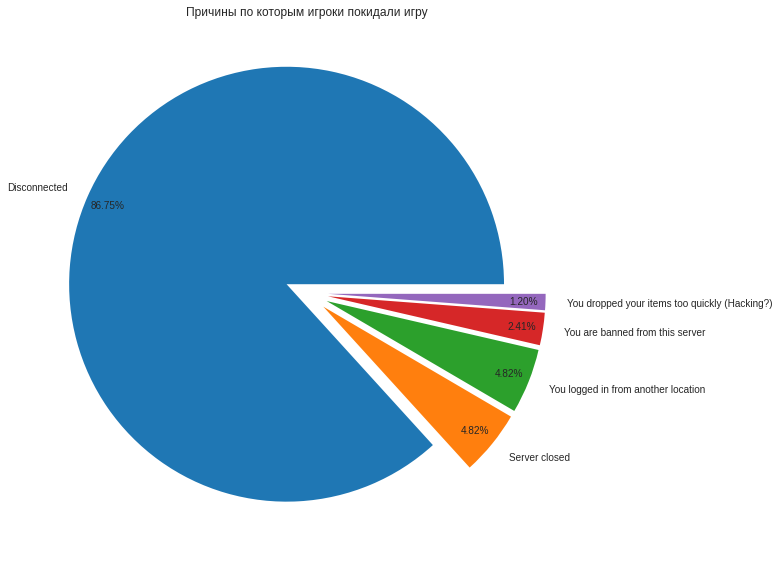

In [485]:
sort_labels = list(plot_df['reason_lost_connection'].values)

labels = plot_df['reason_lost_connection'].values
value = plot_df['is_lost_connection'].values

# vibo: pie chart
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(10, 10))
  explode = [0.1, 0.1, 0.1, 0.1, 0.1]
  ax.pie(value, labels=labels, pctdistance=0.9, explode=explode, autopct='%1.2f%%', labeldistance=1.1)

  plt.title(f'Причины по которым игроки покидали игру')
  # ax.legend(loc='best')
  plt.show()

Итого возможные варианты покидания сервера игроком (на текущий момент):
* `Disconnected` - стандартный выход из игры;
* `Server closed` - при штатной остановке сервера, если в этот момент игрок играл на сервере;
* `You are banned from this server` - если игрока забаннили;
* `You dropped your items too quickly (Hacking?)` - подозрение в хаккинге;
* `You logged in from another location` - повторная авторизация с другого компьютера.

Еще есть такое сообщение как fell out, формально вы еще на сервере, но вылетели из игры, т.к. кто-то с правили (op) выполнил команду kill user_name.

In [487]:
sub_summary['is_fell_out'] = sub_summary['serv_mess'].map(lambda x: 'fell out' in x)
ind_fell_out = sub_summary[sub_summary['is_fell_out'] == True].index
len(ind_fell_out)

6

Узнаем кому так повезло

In [488]:
sub_summary[sub_summary.index.isin(ind_fell_out)]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_lost_connection,reason_lost_connection,is_fell_out
3304,2023-03-05,14:54:55,Server thread,INFO,vibo fell out of the world,False,False,False,NaN,True
4254,2023-03-06,21:02:12,Server thread,INFO,testing2 fell out of the world,False,False,False,NaN,True
5768,2023-03-08,19:58:07,Server thread,INFO,testing2 fell out of the world,False,False,False,NaN,True
5774,2023-03-08,19:59:10,Server thread,INFO,testing2 fell out of the world,False,False,False,NaN,True
5788,2023-03-08,20:04:55,Server thread,INFO,testing2 fell out of the world,False,False,False,NaN,True
6245,2023-03-09,18:45:09,Server thread,INFO,_Rocket5500_ fell out of the world,False,False,False,NaN,True


In [489]:
# vibo: сохраняемся
sub_summary.to_csv('/content/drive/MyDrive/minecraft/sub_summary.csv')

#### Игровой таймлайн

In [493]:
# vibo: читаем
sub_summary = pd.read_csv('/content/drive/MyDrive/minecraft/sub_summary.csv', index_col=0)

In [495]:
sub_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 9 to 6581
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    5003 non-null   object
 1   time                    5003 non-null   object
 2   serv_teg_inf            5003 non-null   object
 3   serv_teg                5003 non-null   object
 4   serv_mess               5003 non-null   object
 5   is_user_join            5003 non-null   bool  
 6   is_user_left            5003 non-null   bool  
 7   is_lost_connection      5003 non-null   bool  
 8   reason_lost_connection  83 non-null     object
 9   is_fell_out             5003 non-null   bool  
dtypes: bool(4), object(6)
memory usage: 293.1+ KB


In [494]:
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_lost_connection,reason_lost_connection,is_fell_out
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2,False,False,False,NaN,False
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties,False,False,False,NaN,False
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...,False,False,False,NaN,False
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled,False,False,False,NaN,False
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12,False,False,False,NaN,False
...,...,...,...,...,...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game,False,True,False,NaN,False
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,True,False,False,NaN,False
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,False,False,False,NaN,False
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,False,False,False,NaN,False


In [496]:
# vibo: делаем столбец для перехода в pd.to_datetime
sub_summary['date_time'] = sub_summary['date'] + ' ' + sub_summary['time']
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_lost_connection,reason_lost_connection,is_fell_out,date_time
9,2023-02-13,21:34:07,Server thread,INFO,Starting minecraft server version 1.19.2,False,False,False,NaN,False,2023-02-13 21:34:07
10,2023-02-13,21:34:07,Server thread,INFO,Loading properties,False,False,False,NaN,False,2023-02-13 21:34:07
11,2023-02-13,21:34:07,Server thread,INFO,This server is running CraftBukkit version 36...,False,False,False,NaN,False,2023-02-13 21:34:07
12,2023-02-13,21:34:07,Server thread,INFO,Debug logging is disabled,False,False,False,NaN,False,2023-02-13 21:34:07
13,2023-02-13,21:34:07,Server thread,INFO,Server Ping Player Sample Count: 12,False,False,False,NaN,False,2023-02-13 21:34:07
...,...,...,...,...,...,...,...,...,...,...,...
6576,2023-03-09,18:45:12,Server thread,INFO,ARTEXX left the game,False,True,False,NaN,False,2023-03-09 18:45:12
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,True,False,False,NaN,False,2023-03-09 18:50:50
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,False,False,False,NaN,False,2023-03-09 18:50:50
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,False,False,False,NaN,False,2023-03-09 18:52:31


In [499]:
# vibo: преобразовываем тип данных столбца, проверяем
sub_summary['date_time'] = pd.to_datetime(sub_summary['date_time'])
sub_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 9 to 6581
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    5003 non-null   object        
 1   time                    5003 non-null   object        
 2   serv_teg_inf            5003 non-null   object        
 3   serv_teg                5003 non-null   object        
 4   serv_mess               5003 non-null   object        
 5   is_user_join            5003 non-null   bool          
 6   is_user_left            5003 non-null   bool          
 7   is_lost_connection      5003 non-null   bool          
 8   reason_lost_connection  83 non-null     object        
 9   is_fell_out             5003 non-null   bool          
 10  date_time               5003 non-null   datetime64[ns]
dtypes: bool(4), datetime64[ns](1), object(6)
memory usage: 332.2+ KB


In [508]:
sub_summary[sub_summary['date'] == '2023-03-06']

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_lost_connection,reason_lost_connection,is_fell_out,date_time
3681,2023-03-06,18:50:49,Server thread,INFO,Starting minecraft server version 1.19.2,False,False,False,NaN,False,2023-03-06 18:50:49
3682,2023-03-06,18:50:49,Server thread,INFO,Loading properties,False,False,False,NaN,False,2023-03-06 18:50:49
3683,2023-03-06,18:50:49,Server thread,INFO,This server is running CraftBukkit version 36...,False,False,False,NaN,False,2023-03-06 18:50:49
3684,2023-03-06,18:50:49,Server thread,INFO,Debug logging is disabled,False,False,False,NaN,False,2023-03-06 18:50:49
3685,2023-03-06,18:50:49,Server thread,INFO,Server Ping Player Sample Count: 12,False,False,False,NaN,False,2023-03-06 18:50:49
...,...,...,...,...,...,...,...,...,...,...,...
4769,2023-03-06,23:10:48,Server thread,INFO,Saving chunks for level 'ServerLevel[world_th...,False,False,False,NaN,False,2023-03-06 23:10:48
4770,2023-03-06,23:10:48,Server thread,INFO,ThreadedAnvilChunkStorage (world): All chunks...,False,False,False,NaN,False,2023-03-06 23:10:48
4771,2023-03-06,23:10:48,Server thread,INFO,ThreadedAnvilChunkStorage (DIM-1): All chunks...,False,False,False,NaN,False,2023-03-06 23:10:48
4772,2023-03-06,23:10:48,Server thread,INFO,ThreadedAnvilChunkStorage (DIM1): All chunks ...,False,False,False,NaN,False,2023-03-06 23:10:48


##### **Старт сервера**

In [507]:
df_is_start = sub_summary['serv_mess'].map(lambda x: 'Starting minecraft server' in x).to_frame(name='is_start')
ind_is_start = df_is_start[df_is_start['is_start'] == True].index
len(ind_is_start)

27

##### **Сервер запущен**

In [509]:
df_done = sub_summary['serv_mess'].map(lambda x: 'Done' in x).to_frame(name='done')
ind_done = df_done[df_done['done'] == True].index
len(ind_done)

27

##### **Игрок присоединился к серверу**

In [512]:
ind_user_join = sub_summary[sub_summary['is_user_join'] == True].index
len(ind_user_join)

88

##### **С игроком потеряно соединение**

In [514]:
ind_lost_connection = sub_summary[sub_summary['is_lost_connection'] == True].index
len(ind_lost_connection)

83

По причине:

In [522]:
sub_summary[sub_summary.index.isin(ind_lost_connection)]

,date,time,serv_teg_inf,serv_teg,serv_mess,is_user_join,is_user_left,is_lost_connection,reason_lost_connection,is_fell_out,date_time
403,2023-02-13,21:57:51,Server thread,INFO,vibO lost connection: Disconnected,False,False,True,Disconnected,False,2023-02-13 21:57:51
572,2023-02-14,00:15:19,Server thread,INFO,vibO lost connection: Disconnected,False,False,True,Disconnected,False,2023-02-14 00:15:19
924,2023-02-14,23:58:51,Server thread,INFO,vibO lost connection: Server closed,False,False,True,Server closed,False,2023-02-14 23:58:51
1099,2023-02-17,19:07:04,Server thread,INFO,YOUTUBE_plaY lost connection: Disconnected,False,False,True,Disconnected,False,2023-02-17 19:07:04
1131,2023-02-17,19:34:51,Server thread,INFO,vibo lost connection: Disconnected,False,False,True,Disconnected,False,2023-02-17 19:34:51
...,...,...,...,...,...,...,...,...,...,...,...
6280,2023-03-09,21:25:30,Server thread,INFO,_Rocket5500_ lost connection: Disconnected,False,False,True,Disconnected,False,2023-03-09 21:25:30
6538,2023-03-09,17:59:49,Server thread,INFO,ARTEXX lost connection: Disconnected,False,False,True,Disconnected,False,2023-03-09 17:59:49
6544,2023-03-09,18:02:55,Server thread,INFO,ARTEEXX lost connection: Disconnected,False,False,True,Disconnected,False,2023-03-09 18:02:55
6551,2023-03-09,18:04:34,Server thread,INFO,AARRTTEEXX lost connection: Disconnected,False,False,True,Disconnected,False,2023-03-09 18:04:34


##### **Игрок покинул сервер**

In [513]:
ind_user_left = sub_summary[sub_summary['is_user_left'] == True].index
len(ind_user_left)

83

##### **Игрок выпал из мира**

In [515]:
ind_fell_out = sub_summary[sub_summary['is_fell_out'] == True].index
len(ind_fell_out)

6

##### **Остановка сервера**

In [510]:
df_is_stop = sub_summary['serv_mess'].map(lambda x: 'Stopping the server' in x).to_frame(name='is_stop')
ind_is_stop = df_is_stop[df_is_stop['is_stop'] == True].index
len(ind_is_stop)

11

##### **Успешное сохранение состояния**

In [511]:
df_save_is_ok = sub_summary['serv_mess'].map(lambda x: 'All dimensions are saved' in x).to_frame(name='save_is_ok')
ind_save_is_ok = df_save_is_ok[df_save_is_ok['save_is_ok'] == True].index
len(ind_save_is_ok)

11

#### Операторы сервера

Продолжаем выделять информацию из дополнительного сообщения сервера, посмотрим, кто из пользователей был наделен правом оператора сервера.

In [ ]:
summary['is_op'] = summary['serv_mess'].map(lambda x: 'server operator' in x).to_frame()
summary[summary['is_op'] == True][['date', 'time', 'serv_mess', 'is_op']]

,date,time,serv_mess,is_op
400,2023-02-13,21:57:06,Made vibO a server operator,True
1104,2023-02-17,19:10:02,Made YOUTUBE_plaY a server operator,True
1159,2023-02-17,19:45:04,Made vibo a server operator,True
1384,2023-03-03,18:03:24,Made LOLOTUK a server operator,True
1629,2023-03-03,19:42:04,Made rex a server operator,True
3180,2023-03-05,12:57:45,Made amogoos a server operator,True
3205,2023-03-05,13:13:49,Made amogoos a server operator,True
3580,2023-03-05,15:33:25,Made testing1 a server operator,True
3920,2023-03-06,20:26:21,Made testing2 a server operator,True
4265,2023-03-06,21:04:44,Made testing3 a server operator,True


In [ ]:
ind_op = summary[summary['is_op'] == True].index
ind_op

Int64Index([ 400, 1104, 1159, 1384, 1629, 3180, 3205, 3580, 3920, 4265, 4981,
            5004, 5387, 5634, 5647, 6241, 6276, 6277, 6278, 6560],
           dtype='int64')

In [ ]:
summary[summary.index.isin(ind_op)][['date', 'time', 'serv_mess', 'is_op']]

,date,time,serv_mess,is_op
400,2023-02-13,21:57:06,Made vibO a server operator,True
1104,2023-02-17,19:10:02,Made YOUTUBE_plaY a server operator,True
1159,2023-02-17,19:45:04,Made vibo a server operator,True
1384,2023-03-03,18:03:24,Made LOLOTUK a server operator,True
1629,2023-03-03,19:42:04,Made rex a server operator,True
3180,2023-03-05,12:57:45,Made amogoos a server operator,True
3205,2023-03-05,13:13:49,Made amogoos a server operator,True
3580,2023-03-05,15:33:25,Made testing1 a server operator,True
3920,2023-03-06,20:26:21,Made testing2 a server operator,True
4265,2023-03-06,21:04:44,Made testing3 a server operator,True


In [ ]:
# vibo: выделим имя оператора сервера
summary['op_name'] = summary[summary.index.isin(ind_op)]['serv_mess'].map(lambda x: x.split()[1])
summary[summary['is_op'] == True][['date', 'time', 'serv_mess', 'is_op', 'op_name']]

,date,time,serv_mess,is_op,op_name
400,2023-02-13,21:57:06,Made vibO a server operator,True,vibO
1104,2023-02-17,19:10:02,Made YOUTUBE_plaY a server operator,True,YOUTUBE_plaY
1159,2023-02-17,19:45:04,Made vibo a server operator,True,vibo
1384,2023-03-03,18:03:24,Made LOLOTUK a server operator,True,LOLOTUK
1629,2023-03-03,19:42:04,Made rex a server operator,True,rex
3180,2023-03-05,12:57:45,Made amogoos a server operator,True,amogoos
3205,2023-03-05,13:13:49,Made amogoos a server operator,True,amogoos
3580,2023-03-05,15:33:25,Made testing1 a server operator,True,testing1
3920,2023-03-06,20:26:21,Made testing2 a server operator,True,testing2
4265,2023-03-06,21:04:44,Made testing3 a server operator,True,testing3


In [ ]:
# vibo: уникальные пользователи, получившие права оператора сервера
sorted(list(summary[summary['is_op'] == True]['op_name'].unique()))

['ARTEXX',
 'Fredi',
 'LOLOTUK',
 'Umni4ok100200',
 'YOUTUBE_plaY',
 '_Rocket5500_',
 'aaaaa',
 'amogoos',
 'rex',
 'testing1',
 'testing2',
 'testing3',
 'vibO',
 'vibo']

In [ ]:
# vibo: количество уникальных пользователей, получивших права оператора сервера
len(list(summary[summary['is_op'] == True]['op_name'].unique()))

14

In [ ]:
# vibo: когда были выданы права администратора
summary[summary['is_op'] == True].groupby(['date', 'time', 'op_name'])[['op_name']].size()

date         time      op_name      
2023-02-13   21:57:06  vibO             1
2023-02-17   19:10:02  YOUTUBE_plaY     1
             19:45:04  vibo             1
2023-03-03   18:03:24  LOLOTUK          1
             19:42:04  rex              1
2023-03-05   12:57:45  amogoos          1
             13:13:49  amogoos          1
             15:33:25  testing1         1
2023-03-06   20:26:21  testing2         1
             21:04:44  testing3         1
2023-03-07   14:49:00  Fredi            1
             18:01:36  Fredi            1
2023-03-08   14:28:35  Umni4ok100200    1
             16:58:22  aaaaa            1
             17:02:38  aaaaa            1
2023-03-09   18:19:51  ARTEXX           1
             18:43:23  _Rocket5500_     1
             21:24:05  _Rocket5500_     1
             21:24:38  _Rocket5500_     1
             21:24:50  _Rocket5500_     1
dtype: int64

### **Worker-Main**

Смотрим на сообщения в категории `Worker-Main`

In [ ]:
summary[summary['serv_teg_inf'] == 'Worker-Main']

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
129,2023-02-13,21:34:31,Worker-Main,INFO,Preparing spawn area: 0%,NaN,4.0,NaN
130,2023-02-13,21:34:31,Worker-Main,INFO,Preparing spawn area: 0%,NaN,4.0,NaN
131,2023-02-13,21:34:31,Worker-Main,INFO,Preparing spawn area: 0%,NaN,6.0,NaN
132,2023-02-13,21:34:31,Worker-Main,INFO,Preparing spawn area: 0%,NaN,7.0,NaN
133,2023-02-13,21:34:32,Worker-Main,INFO,Preparing spawn area: 0%,NaN,6.0,NaN
...,...,...,...,...,...,...,...,...
6506,2023-03-09,17:56:40,Worker-Main,INFO,Preparing spawn area: 13%,NaN,7.0,NaN
6507,2023-03-09,17:56:40,Worker-Main,INFO,Preparing spawn area: 35%,NaN,7.0,NaN
6508,2023-03-09,17:56:41,Worker-Main,INFO,Preparing spawn area: 62%,NaN,4.0,NaN
6509,2023-03-09,17:56:41,Worker-Main,INFO,Preparing spawn area: 83%,NaN,3.0,NaN


In [ ]:
summary[summary['serv_teg_inf'] == 'Worker-Main'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 129 to 6510
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       891 non-null    object 
 1   time                       891 non-null    object 
 2   serv_teg_inf               891 non-null    object 
 3   serv_teg                   891 non-null    object 
 4   serv_mess                  891 non-null    object 
 5   user_authenticator_number  0 non-null      float64
 6   worker_main_number         891 non-null    float64
 7   async_chat_thread_number   0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


Видно, что два столбца из рассмотрения можно сразу исключить, выделим данные в отдельный датафрейм

In [ ]:
sub_summary = summary[summary['serv_teg_inf'] == 'Worker-Main'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess', 'worker_main_number']]
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess,worker_main_number
129,2023-02-13,21:34:31,Worker-Main,INFO,Preparing spawn area: 0%,4.0
130,2023-02-13,21:34:31,Worker-Main,INFO,Preparing spawn area: 0%,4.0
131,2023-02-13,21:34:31,Worker-Main,INFO,Preparing spawn area: 0%,6.0
132,2023-02-13,21:34:31,Worker-Main,INFO,Preparing spawn area: 0%,7.0
133,2023-02-13,21:34:32,Worker-Main,INFO,Preparing spawn area: 0%,6.0
...,...,...,...,...,...,...
6506,2023-03-09,17:56:40,Worker-Main,INFO,Preparing spawn area: 13%,7.0
6507,2023-03-09,17:56:40,Worker-Main,INFO,Preparing spawn area: 35%,7.0
6508,2023-03-09,17:56:41,Worker-Main,INFO,Preparing spawn area: 62%,4.0
6509,2023-03-09,17:56:41,Worker-Main,INFO,Preparing spawn area: 83%,3.0


In [ ]:
sub_summary[sub_summary['serv_teg_inf'] == 'Worker-Main'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,891,891,891,891,891
unique,10,213,1,1,85
top,2023-03-04,18:28:23,Worker-Main,INFO,Preparing spawn area: 0%
freq,154,17,891,891,674


Самые популярные сообщения в категории `Worker-Main`

In [ ]:
# vibo: найдем самые популярные сообщения в категории
summary[summary['serv_teg_inf'] == 'Worker-Main']['serv_mess'].value_counts()

 Preparing spawn area: 0%     674
 Preparing spawn area: 9%       8
 Preparing spawn area: 4%       7
 Preparing spawn area: 1%       7
 Preparing spawn area: 83%      7
                             ... 
 Preparing spawn area: 66%      1
 Preparing spawn area: 56%      1
 Preparing spawn area: 42%      1
 Preparing spawn area: 15%      1
 Preparing spawn area: 78%      1
Name: serv_mess, Length: 85, dtype: int64

### **User Authenticator**

Смотрим на сообщения в категории `User Authenticator`

In [ ]:
summary[summary['serv_teg_inf'] == 'User Authenticator']

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,is_op,op_name
393,2023-02-13,21:49:48,User Authenticator,INFO,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0,NaN,NaN,False,NaN
566,2023-02-13,22:01:24,User Authenticator,INFO,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0,NaN,NaN,False,NaN
914,2023-02-14,23:53:33,User Authenticator,INFO,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0,NaN,NaN,False,NaN
1095,2023-02-17,19:05:26,User Authenticator,INFO,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,1.0,NaN,NaN,False,NaN
1101,2023-02-17,19:07:53,User Authenticator,INFO,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,2.0,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...
6535,2023-03-09,17:58:27,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,1.0,NaN,NaN,False,NaN
6540,2023-03-09,18:01:54,User Authenticator,INFO,UUID of player ARTEEXX is 8c767e42-029f-3dee-...,2.0,NaN,NaN,False,NaN
6546,2023-03-09,18:04:00,User Authenticator,INFO,UUID of player AARRTTEEXX is 843fa0f7-aebb-3f...,3.0,NaN,NaN,False,NaN
6553,2023-03-09,18:16:03,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,4.0,NaN,NaN,False,NaN


In [ ]:
summary[summary['serv_teg_inf'] == 'User Authenticator'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 393 to 6577
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       93 non-null     object 
 1   time                       93 non-null     object 
 2   serv_teg_inf               93 non-null     object 
 3   serv_teg                   93 non-null     object 
 4   serv_mess                  93 non-null     object 
 5   user_authenticator_number  93 non-null     float64
 6   worker_main_number         0 non-null      float64
 7   async_chat_thread_number   0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 6.5+ KB


Видно, что последние два столбца из рассмотрения можно сразу исключить, выделим данные в отдельный датафрейм

In [ ]:
sub_summary = summary[summary['serv_teg_inf'] == 'User Authenticator'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess', 'user_authenticator_number']]
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number
393,2023-02-13,21:49:48,User Authenticator,INFO,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0
566,2023-02-13,22:01:24,User Authenticator,INFO,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0
914,2023-02-14,23:53:33,User Authenticator,INFO,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0
1095,2023-02-17,19:05:26,User Authenticator,INFO,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,1.0
1101,2023-02-17,19:07:53,User Authenticator,INFO,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,2.0
...,...,...,...,...,...,...
6535,2023-03-09,17:58:27,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,1.0
6540,2023-03-09,18:01:54,User Authenticator,INFO,UUID of player ARTEEXX is 8c767e42-029f-3dee-...,2.0
6546,2023-03-09,18:04:00,User Authenticator,INFO,UUID of player AARRTTEEXX is 843fa0f7-aebb-3f...,3.0
6553,2023-03-09,18:16:03,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,4.0


In [ ]:
sub_summary[sub_summary['serv_teg_inf'] == 'User Authenticator'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,93,93,93,93,93
unique,10,93,1,1,21
top,2023-03-06,21:49:48,User Authenticator,INFO,UUID of player testing1 is 4e9071c3-79ab-3a3a...
freq,24,1,93,93,15


Самые популярные сообщения в категории `User Authenticator`

In [ ]:
# vibo: найдем самые популярные сообщения в категории
summary[summary['serv_teg_inf'] == 'User Authenticator']['serv_mess'].value_counts()

 UUID of player testing1 is 4e9071c3-79ab-3a3a-ab83-2e04eacd6854            15
 UUID of player YOUTUBE_plaY is 56eb670a-4ed0-3009-9bc9-00d047fbaeff        14
 UUID of player amogoos is bb8d3a15-62ea-3dd7-8df8-776e0930f557             12
 UUID of player testing2 is 5e20431e-cf2a-314e-a557-c5525d567366             9
 UUID of player vibo is f4a7e80b-36fa-3e7a-814b-9824a8ccd5f9                 7
 UUID of player rex is 74d83d51-5bf6-37fb-8395-9a0590a59259                  6
 UUID of player testing3 is 0c9c0d31-79b7-3cc6-894a-5b40d339bd72             4
 UUID of player ARTEXX is ee86a614-d39f-3a50-aef4-d8029433b0f5               3
 UUID of player aaaaa is 77cc7b98-f829-305b-9a13-dbb088fbd0f5                3
 UUID of player Fredi is 1ee24d02-4446-35e1-84c8-4b785c1bae33                3
 UUID of player vibO is 426ba0c3-6437-3e82-b36b-ca953fb41a42                 3
 UUID of player gggggg102 is d755a875-1b70-3b66-bd19-b2b67e593159            3
 UUID of player _Rocket5500_ is a6be4875-0cf6-3c5a-9

#### User Name & UUID

Посмотрим на сообщения в категории `User Authenticator`, видим, что можем выделить `user_name` и `UUID`

In [ ]:
summary[summary['serv_teg_inf'] == 'User Authenticator']

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,is_op,op_name
393,2023-02-13,21:49:48,User Authenticator,INFO,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0,NaN,NaN,False,NaN
566,2023-02-13,22:01:24,User Authenticator,INFO,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0,NaN,NaN,False,NaN
914,2023-02-14,23:53:33,User Authenticator,INFO,UUID of player vibO is 426ba0c3-6437-3e82-b36...,1.0,NaN,NaN,False,NaN
1095,2023-02-17,19:05:26,User Authenticator,INFO,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,1.0,NaN,NaN,False,NaN
1101,2023-02-17,19:07:53,User Authenticator,INFO,UUID of player YOUTUBE_plaY is 56eb670a-4ed0-...,2.0,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...
6535,2023-03-09,17:58:27,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,1.0,NaN,NaN,False,NaN
6540,2023-03-09,18:01:54,User Authenticator,INFO,UUID of player ARTEEXX is 8c767e42-029f-3dee-...,2.0,NaN,NaN,False,NaN
6546,2023-03-09,18:04:00,User Authenticator,INFO,UUID of player AARRTTEEXX is 843fa0f7-aebb-3f...,3.0,NaN,NaN,False,NaN
6553,2023-03-09,18:16:03,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,4.0,NaN,NaN,False,NaN


In [ ]:
summary[summary['serv_teg_inf'] == 'User Authenticator'].groupby(['date'])['date'].count().to_frame(name='count_authent').reset_index()

,date,count_authent
0,2023-02-13,2
1,2023-02-14,1
2,2023-02-17,8
3,2023-03-03,11
4,2023-03-04,3
5,2023-03-05,17
6,2023-03-06,24
7,2023-03-07,10
8,2023-03-08,10
9,2023-03-09,7


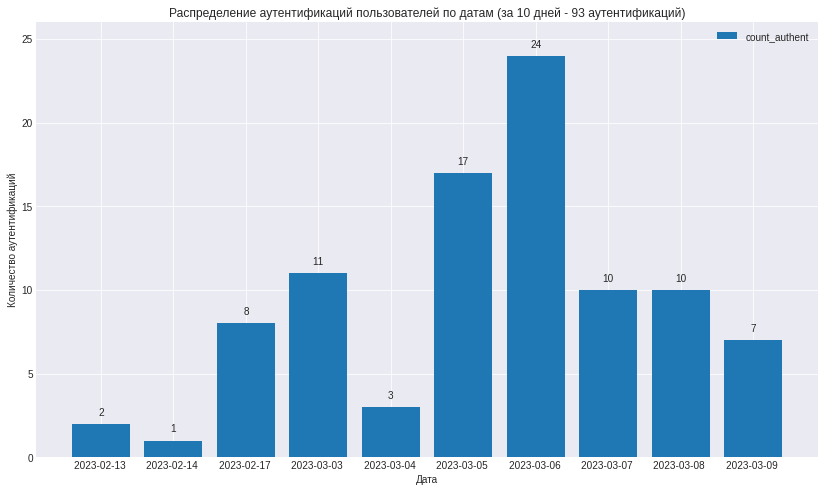

In [ ]:
# vibo: data
plot_df = summary[summary['serv_teg_inf'] == 'User Authenticator'].groupby(['date'])['date'].count().to_frame(name='count_authent').reset_index()
groups_x = plot_df['date'].values
values_y = plot_df['count_authent'].values

# vibo: bar chart whith total value labels
# vibo: здесь можно поиграться с номером темы (0-27)
plot_style = 16
with plt.style.context(plt.style.available[plot_style]):
  fig, ax = plt.subplots(figsize=(14, 8))
  ax.bar(groups_x, values_y, label = "count_authent")

  for i, total in enumerate(values_y):
    ax.text(i, total + 0.5, values_y[i], ha='center')

  plt.title(f'Распределение аутентификаций пользователей по датам (за {len(groups_x)} дней - {sum(values_y)} аутентификаций)')
  ax.legend(loc='best')
  ax.set_xlabel('Дата')
  ax.set_ylim(0, 26)
  ax.set_ylabel('Количество аутентификаций')
  plt.show()

Пример расшифровки UUID из интернета

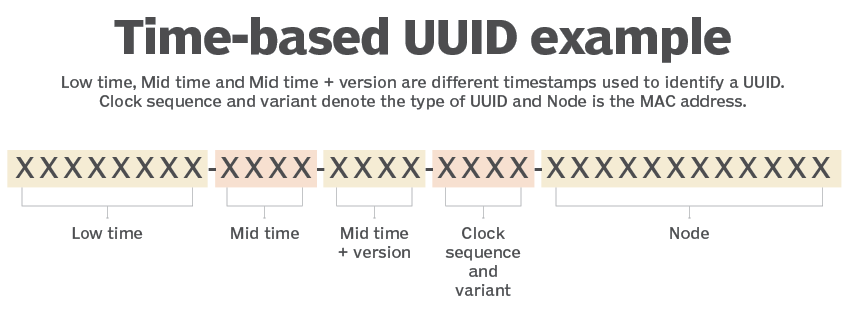

In [ ]:
# vibo: выделяем имя пользователя и его UUID
summary['user_name'] = summary[summary['serv_teg_inf'] == 'User Authenticator']['serv_mess'].map(lambda x: x.split()[3])
summary['uuid'] = summary[summary['serv_teg_inf'] == 'User Authenticator']['serv_mess'].map(lambda x: x.split()[5])
summary[summary['serv_teg_inf'] == 'User Authenticator'][['date', 'user_authenticator_number', 'user_name', 'uuid']]

,date,user_authenticator_number,user_name,uuid
393,2023-02-13,1.0,vibO,426ba0c3-6437-3e82-b36b-ca953fb41a42
566,2023-02-13,1.0,vibO,426ba0c3-6437-3e82-b36b-ca953fb41a42
914,2023-02-14,1.0,vibO,426ba0c3-6437-3e82-b36b-ca953fb41a42
1095,2023-02-17,1.0,YOUTUBE_plaY,56eb670a-4ed0-3009-9bc9-00d047fbaeff
1101,2023-02-17,2.0,YOUTUBE_plaY,56eb670a-4ed0-3009-9bc9-00d047fbaeff
...,...,...,...,...
6535,2023-03-09,1.0,ARTEXX,ee86a614-d39f-3a50-aef4-d8029433b0f5
6540,2023-03-09,2.0,ARTEEXX,8c767e42-029f-3dee-99c9-1bccb126c2d8
6546,2023-03-09,3.0,AARRTTEEXX,843fa0f7-aebb-3f41-ba00-efc9ea7989f8
6553,2023-03-09,4.0,ARTEXX,ee86a614-d39f-3a50-aef4-d8029433b0f5


UUID привязан к имени пользователя

In [ ]:
# vibo: суммарное количество аутентификаций пользователей за период
summary[summary['serv_teg_inf'] == 'User Authenticator'].groupby(['serv_mess']).size().sort_values(ascending=False)

serv_mess
 UUID of player testing1 is 4e9071c3-79ab-3a3a-ab83-2e04eacd6854            15
 UUID of player YOUTUBE_plaY is 56eb670a-4ed0-3009-9bc9-00d047fbaeff        14
 UUID of player amogoos is bb8d3a15-62ea-3dd7-8df8-776e0930f557             12
 UUID of player testing2 is 5e20431e-cf2a-314e-a557-c5525d567366             9
 UUID of player vibo is f4a7e80b-36fa-3e7a-814b-9824a8ccd5f9                 7
 UUID of player rex is 74d83d51-5bf6-37fb-8395-9a0590a59259                  6
 UUID of player testing3 is 0c9c0d31-79b7-3cc6-894a-5b40d339bd72             4
 UUID of player ARTEXX is ee86a614-d39f-3a50-aef4-d8029433b0f5               3
 UUID of player Fredi is 1ee24d02-4446-35e1-84c8-4b785c1bae33                3
 UUID of player vibO is 426ba0c3-6437-3e82-b36b-ca953fb41a42                 3
 UUID of player aaaaa is 77cc7b98-f829-305b-9a13-dbb088fbd0f5                3
 UUID of player gggggg102 is d755a875-1b70-3b66-bd19-b2b67e593159            3
 UUID of player LOLOTUK is 351abe30-df95-3

### **ServerMain**

Смотрим на сообщения в категории `ServerMain`

In [ ]:
summary[summary['serv_teg_inf'] == 'ServerMain']

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6032,2023-03-09,18:37:58,ServerMain,INFO,Environment: authHost='https://authserver.moj...,NaN,NaN,NaN
6033,2023-03-09,18:38:00,ServerMain,INFO,Loaded 7 recipes,NaN,NaN,NaN
6299,2023-03-09,17:55:51,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN
6300,2023-03-09,17:55:54,ServerMain,INFO,Environment: authHost='https://authserver.moj...,NaN,NaN,NaN


In [ ]:
summary[summary['serv_teg_inf'] == 'ServerMain'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 6301
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       86 non-null     object 
 1   time                       86 non-null     object 
 2   serv_teg_inf               86 non-null     object 
 3   serv_teg                   86 non-null     object 
 4   serv_mess                  86 non-null     object 
 5   user_authenticator_number  0 non-null      float64
 6   worker_main_number         0 non-null      float64
 7   async_chat_thread_number   0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 6.0+ KB


Видно, что последние столбцы из рассмотрения можно сразу исключить, выделим данные в отдельный датафрейм

In [ ]:
sub_summary = summary[summary['serv_teg_inf'] == 'ServerMain'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']]
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer
...,...,...,...,...,...
6032,2023-03-09,18:37:58,ServerMain,INFO,Environment: authHost='https://authserver.moj...
6033,2023-03-09,18:38:00,ServerMain,INFO,Loaded 7 recipes
6299,2023-03-09,17:55:51,ServerMain,INFO,Building unoptimized datafixer
6300,2023-03-09,17:55:54,ServerMain,INFO,Environment: authHost='https://authserver.moj...


In [ ]:
sub_summary[sub_summary['serv_teg_inf'] == 'ServerMain'].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,86,86,86,86,86
unique,10,83,1,3,7
top,2023-03-04,21:31:48,ServerMain,INFO,Building unoptimized datafixer
freq,15,3,86,84,28


Самые популярные сообщения в категории `ServerMain`

In [ ]:
# vibo: найдем самые популярные сообщения в категории
summary[summary['serv_teg_inf'] == 'ServerMain']['serv_mess'].value_counts()

 Building unoptimized datafixer                                                                                                                                                                                 28
 Environment: authHost='https://authserver.mojang.com', accountsHost='https://api.mojang.com', sessionHost='https://sessionserver.mojang.com', servicesHost='https://api.minecraftservices.com', name='PROD'    27
 Loaded 7 recipes                                                                                                                                                                                               27
 Failed to load properties from file: server.properties                                                                                                                                                          1
 Failed to load eula.txt                                                                                                                                    

### **Async Chat Thread**

Смотрим на сообщения в категории `Async Chat Thread`

In [ ]:
summary[summary['serv_teg_inf'] == 'Async Chat Thread']

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,is_op,op_name,user_name,uuid
1153,2023-02-17,19:41:22,Async Chat Thread,INFO,[Not Secure] <vibo> привет!!!,NaN,NaN,0.0,False,NaN,NaN,NaN
1154,2023-02-17,19:41:54,Async Chat Thread,INFO,[Not Secure] <vibo> ты можешь выдать мне прав...,NaN,NaN,0.0,False,NaN,NaN,NaN
1155,2023-02-17,19:42:08,Async Chat Thread,INFO,[Not Secure] <YOUTUBE_plaY> да да,NaN,NaN,0.0,False,NaN,NaN,NaN
1157,2023-02-17,19:43:23,Async Chat Thread,INFO,[Not Secure] <YOUTUBE_plaY> всё дал,NaN,NaN,2.0,False,NaN,NaN,NaN
1164,2023-02-17,19:45:47,Async Chat Thread,INFO,[Not Secure] <vibo> спасибо! все получилось,NaN,NaN,4.0,False,NaN,NaN,NaN
1169,2023-02-17,19:48:23,Async Chat Thread,INFO,[Not Secure] <YOUTUBE_plaY> давй пвп,NaN,NaN,6.0,False,NaN,NaN,NaN
1170,2023-02-17,19:48:36,Async Chat Thread,INFO,[Not Secure] <vibo> давай,NaN,NaN,6.0,False,NaN,NaN,NaN
1173,2023-02-17,19:49:04,Async Chat Thread,INFO,[Not Secure] <vibo> ты готов?,NaN,NaN,6.0,False,NaN,NaN,NaN
1191,2023-02-17,20:05:41,Async Chat Thread,INFO,[Not Secure] <YOUTUBE_plaY> что будем делать,NaN,NaN,8.0,False,NaN,NaN,NaN
1192,2023-02-17,20:07:01,Async Chat Thread,INFO,[Not Secure] <vibo> я убрал лаву,NaN,NaN,10.0,False,NaN,NaN,NaN


In [ ]:
summary[summary['serv_teg_inf'] == 'Async Chat Thread'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 1153 to 5744
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       19 non-null     object 
 1   time                       19 non-null     object 
 2   serv_teg_inf               19 non-null     object 
 3   serv_teg                   19 non-null     object 
 4   serv_mess                  19 non-null     object 
 5   user_authenticator_number  0 non-null      float64
 6   worker_main_number         0 non-null      float64
 7   async_chat_thread_number   19 non-null     float64
dtypes: float64(3), object(5)
memory usage: 1.3+ KB


Видно, что некоторые столбцы из рассмотрения можно сразу исключить, выделим данные в отдельный датафрейм

In [ ]:
sub_summary = summary[summary['serv_teg_inf'] == 'Async Chat Thread'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess', 'async_chat_thread_number']]
sub_summary

,date,time,serv_teg_inf,serv_teg,serv_mess,async_chat_thread_number
1153,2023-02-17,19:41:22,Async Chat Thread,INFO,[Not Secure] <vibo> привет!!!,0.0
1154,2023-02-17,19:41:54,Async Chat Thread,INFO,[Not Secure] <vibo> ты можешь выдать мне прав...,0.0
1155,2023-02-17,19:42:08,Async Chat Thread,INFO,[Not Secure] <YOUTUBE_plaY> да да,0.0
1157,2023-02-17,19:43:23,Async Chat Thread,INFO,[Not Secure] <YOUTUBE_plaY> всё дал,2.0
1164,2023-02-17,19:45:47,Async Chat Thread,INFO,[Not Secure] <vibo> спасибо! все получилось,4.0
1169,2023-02-17,19:48:23,Async Chat Thread,INFO,[Not Secure] <YOUTUBE_plaY> давй пвп,6.0
1170,2023-02-17,19:48:36,Async Chat Thread,INFO,[Not Secure] <vibo> давай,6.0
1173,2023-02-17,19:49:04,Async Chat Thread,INFO,[Not Secure] <vibo> ты готов?,6.0
1191,2023-02-17,20:05:41,Async Chat Thread,INFO,[Not Secure] <YOUTUBE_plaY> что будем делать,8.0
1192,2023-02-17,20:07:01,Async Chat Thread,INFO,[Not Secure] <vibo> я убрал лаву,10.0


In [ ]:
sub_summary[sub_summary['serv_teg_inf'] == 'Async Chat Thread'][['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess
count,19,19,19,19,19
unique,4,19,1,1,19
top,2023-02-17,19:41:22,Async Chat Thread,INFO,[Not Secure] <vibo> привет!!!
freq,12,1,19,19,1


Самые популярные сообщения в категории `Async Chat Thread`

In [ ]:
# vibo: найдем самые популярные сообщения в категории
summary[summary['serv_teg_inf'] == 'Async Chat Thread']['serv_mess'].value_counts()


 [Not Secure] <vibo> привет!!!                                                      1
 [Not Secure] <YOUTUBE_plaY> выбераеш ты                                            1
 [Not Secure] <vibo> как ты поменял цвет маяка?                                     1
 [Not Secure] <amogoos> дааааааааада                                                1
 [Not Secure] <vibo> ты меня слышышь?                                               1
 [Not Secure] <vibo> прием                                                          1
 [Not Secure] <amogoos> amogoos red                                                 1
 [Not Secure] <rex> fhgfjhgj                                                        1
 [Not Secure] <vibo> хочу понять как делать спавн поинт для новых игроков           1
 [Not Secure] <vibo> я убрал лаву                                                   1
 [Not Secure] <vibo> ты можешь выдать мне права админа на твоем сервере?            1
 [Not Secure] <YOUTUBE_plaY> что будем делать         

#### Игровой чат

In [ ]:
summary[summary['serv_teg_inf'] == 'Async Chat Thread'][['date', 'time', 'user_name', 'serv_mess', 'async_chat_thread_number']]

,date,time,user_name,serv_mess,async_chat_thread_number
1153,2023-02-17,19:41:22,NaN,[Not Secure] <vibo> привет!!!,0.0
1154,2023-02-17,19:41:54,NaN,[Not Secure] <vibo> ты можешь выдать мне прав...,0.0
1155,2023-02-17,19:42:08,NaN,[Not Secure] <YOUTUBE_plaY> да да,0.0
1157,2023-02-17,19:43:23,NaN,[Not Secure] <YOUTUBE_plaY> всё дал,2.0
1164,2023-02-17,19:45:47,NaN,[Not Secure] <vibo> спасибо! все получилось,4.0
1169,2023-02-17,19:48:23,NaN,[Not Secure] <YOUTUBE_plaY> давй пвп,6.0
1170,2023-02-17,19:48:36,NaN,[Not Secure] <vibo> давай,6.0
1173,2023-02-17,19:49:04,NaN,[Not Secure] <vibo> ты готов?,6.0
1191,2023-02-17,20:05:41,NaN,[Not Secure] <YOUTUBE_plaY> что будем делать,8.0
1192,2023-02-17,20:07:01,NaN,[Not Secure] <vibo> я убрал лаву,10.0


### Обзор действий игрока

Достаточно ввести имя в строку ниже, чтобы получить полную информацию.

In [ ]:
name = 'amogoos'

In [ ]:
# vibo: найдем все упоминания игрока в сообщениях
summary[f'is_{name}'] = summary['serv_mess'].map(lambda x: name in x)
ind_name = summary[summary[f'is_{name}'] == True].index
summary[summary.index.isin(ind_name)]

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,is_op,op_name,user_name,uuid,is_YOUTUBE_plaY,is_rex,is_amogoos
3180,2023-03-05,12:57:45,Server thread,INFO,Made amogoos a server operator,NaN,NaN,NaN,True,amogoos,NaN,NaN,False,False,True
3181,2023-03-05,12:58:56,User Authenticator,INFO,UUID of player amogoos is bb8d3a15-62ea-3dd7-...,1.0,NaN,NaN,False,NaN,amogoos,bb8d3a15-62ea-3dd7-8df8-776e0930f557,False,False,True
3182,2023-03-05,12:58:56,Server thread,INFO,amogoos joined the game,NaN,NaN,NaN,False,NaN,NaN,NaN,False,False,True
3183,2023-03-05,12:58:57,Server thread,INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,False,NaN,NaN,NaN,False,False,True
3184,2023-03-05,13:01:16,Async Chat Thread,INFO,[Not Secure] <amogoos> amogoos red,NaN,NaN,0.0,False,NaN,NaN,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,2023-03-07,20:21:46,Server thread,INFO,amogoos joined the game,NaN,NaN,NaN,False,NaN,NaN,NaN,False,False,True
5102,2023-03-07,20:21:46,Server thread,INFO,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,False,NaN,NaN,NaN,False,False,True
5103,2023-03-07,20:57:04,Server thread,INFO,amogoos has completed the challenge [Serious ...,NaN,NaN,NaN,False,NaN,NaN,NaN,False,False,True
5104,2023-03-07,21:02:46,Server thread,INFO,amogoos lost connection: Disconnected,NaN,NaN,NaN,False,NaN,NaN,NaN,False,False,True


In [ ]:
# vibo: уникальные аутентифицированные пользователи
sorted(list(summary[summary['serv_teg_inf'] == 'User Authenticator']['user_name'].unique()))

['AARRTTEEXX',
 'ARTEEXX',
 'ARTEXX',
 'Fredi',
 'LOLOTUK',
 'Umni4ok100200',
 'YOUTUBE_plaY',
 '_Rocket5500_',
 'aaaaa',
 'amogoos',
 'amogoos_red',
 'amogoos_red15050',
 'gggggg102',
 'rex',
 'test_name_1',
 'testing1',
 'testing2',
 'testing3',
 'testing4',
 'vibO',
 'vibo']

In [ ]:
# vibo: уникальные UUID
sorted(list(summary[summary['serv_teg_inf'] == 'User Authenticator']['uuid'].unique()))

['0c9c0d31-79b7-3cc6-894a-5b40d339bd72',
 '1ee24d02-4446-35e1-84c8-4b785c1bae33',
 '319be620-93f2-3b87-8414-d9f733460955',
 '351abe30-df95-37d4-940e-b868831fc026',
 '426ba0c3-6437-3e82-b36b-ca953fb41a42',
 '4e9071c3-79ab-3a3a-ab83-2e04eacd6854',
 '56eb670a-4ed0-3009-9bc9-00d047fbaeff',
 '5e20431e-cf2a-314e-a557-c5525d567366',
 '74d83d51-5bf6-37fb-8395-9a0590a59259',
 '77cc7b98-f829-305b-9a13-dbb088fbd0f5',
 '843fa0f7-aebb-3f41-ba00-efc9ea7989f8',
 '8c767e42-029f-3dee-99c9-1bccb126c2d8',
 '90c58b0a-047b-3f41-a2eb-0b295facaf2a',
 '9f566d31-b9cd-3069-9068-967914755363',
 'a101608a-3944-3398-a11e-16211546e19a',
 'a6be4875-0cf6-3c5a-9d9f-b226ad3a4bc1',
 'b78a67d1-e667-3841-a463-64fdf66f2484',
 'bb8d3a15-62ea-3dd7-8df8-776e0930f557',
 'd755a875-1b70-3b66-bd19-b2b67e593159',
 'ee86a614-d39f-3a50-aef4-d8029433b0f5',
 'f4a7e80b-36fa-3e7a-814b-9824a8ccd5f9']

In [ ]:
# vibo: количество уникальных аутентицированных пользователей
len(list(data_logs[data_logs['serv_teg_inf'] == 'User Authenticator']['user_name'].unique()))

15

In [ ]:
len(list(summary[summary['serv_teg_inf'] == 'User Authenticator']['uuid'].unique()))

21

In [ ]:
# vibo: количество аутентификаций в группировке по пользователям
data_logs[data_logs['serv_teg_inf'] == 'User Authenticator'].groupby(['user_name']).size().sort_values(ascending=False)

user_name
testing1            15
YOUTUBE_plaY        14
amogoos             12
testing2             7
rex                  6
vibo                 6
Fredi                3
gggggg102            3
vibO                 3
LOLOTUK              2
amogoos_red          1
amogoos_red15050     1
test_name_1          1
testing3             1
testing4             1
dtype: int64

In [ ]:
# vibo: количество аутентицикаций в день
data_logs[data_logs['serv_teg_inf'] == 'User Authenticator'].groupby(['data']).size()

data
2023-02-13      2
2023-02-14      1
2023-02-17      8
2023-03-03     11
2023-03-04      3
2023-03-05     17
2023-03-06     34
dtype: int64

In [ ]:
# vibo: количество аутентификаций пользователей по дням с группировкой по пользователям
data_logs[data_logs['serv_teg_inf'] == 'User Authenticator'].groupby(['data', 'user_name'])[['user_name']].size()

data         user_name       
2023-02-13   vibO                 2
2023-02-14   vibO                 1
2023-02-17   YOUTUBE_plaY         5
             vibo                 3
2023-03-03   LOLOTUK              2
             YOUTUBE_plaY         6
             rex                  3
2023-03-04   rex                  3
2023-03-05   YOUTUBE_plaY         3
             amogoos              7
             amogoos_red          1
             amogoos_red15050     1
             gggggg102            1
             testing1             1
             vibo                 3
2023-03-06   Fredi                3
             amogoos              5
             gggggg102            2
             test_name_1          1
             testing1            14
             testing2             7
             testing3             1
             testing4             1
dtype: int64

### А что еще?

In [ ]:
data_logs

,data,time,serv_teg,serv_teg_inf,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess,user_is_authenticate,user_name,uuid,is_op,op_name
0,2023-02-13,21:31:47,INFO,ServerMain,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
1,2023-02-13,21:31:48,ERROR,ServerMain,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
2,2023-02-13,21:31:48,WARN,ServerMain,Failed to load eula.txt,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
3,2023-02-13,21:31:48,INFO,ServerMain,You need to agree to the EULA in order to run...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
4,2023-02-13,21:34:03,INFO,ServerMain,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078,2023-03-06,20:21:46,INFO,Server thread,amogoos joined the game,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
5079,2023-03-06,20:21:46,INFO,Server thread,amogoos[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
5080,2023-03-06,20:57:04,INFO,Server thread,amogoos has completed the challenge [Serious ...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN
5081,2023-03-06,21:02:46,INFO,Server thread,amogoos lost connection: Disconnected,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN


Информации в `serv_mess` много, вот, например, что можно:
* вывести время загрузки сервера от старта до метки `Done` (например, `66.075s`);
* найти время работы сервера (между `Starting minecraft server` и `Stopping server`);
* найти время игры каждого пользователя (`vibO joined the game` и `vibO left the game`);
* найти сколько раз игрок погибал и по какой причине (застрелен скелетом, утонул и т.д.);
* найти время 'жизни' персонажа в реальном времение между началом игры и смертью;
* найти кто к кому телепортируется и таким образом строить граф взаимодействия между игроками.

Также можно продолжить поиск информации уже по установленным плагинам (столбец `plug_mess`).

### Плагины и их сообщения

In [ ]:
# vibo: читаем предобработанный лог (index_col=0 считываем индексы тоже)
data_logs = pd.read_csv('/content/drive/MyDrive/minecraft/logs.csv', index_col=0)

In [ ]:
data_logs

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess
0,2023-02-13,21:31:47,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
1,2023-02-13,21:31:48,ServerMain,ERROR,Failed to load properties from file: server.p...,NaN,NaN,NaN,NaN,NaN
2,2023-02-13,21:31:48,ServerMain,WARN,Failed to load eula.txt,NaN,NaN,NaN,NaN,NaN
3,2023-02-13,21:31:48,ServerMain,INFO,You need to agree to the EULA in order to run...,NaN,NaN,NaN,NaN,NaN
5,2023-02-13,21:34:03,ServerMain,INFO,Building unoptimized datafixer,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6577,2023-03-09,18:50:50,User Authenticator,INFO,UUID of player ARTEXX is ee86a614-d39f-3a50-a...,5.0,NaN,NaN,NaN,NaN
6578,2023-03-09,18:50:50,Server thread,INFO,ARTEXX joined the game,NaN,NaN,NaN,NaN,NaN
6579,2023-03-09,18:50:50,Server thread,INFO,ARTEXX[/[0:0:0:0:0:0:0:1,NaN,NaN,NaN,NaN,NaN
6580,2023-03-09,18:52:31,Server thread,INFO,ARTEXX issued server command: /farwand,NaN,NaN,NaN,NaN,NaN


In [ ]:
# vibo: сводная статистика
data_logs[['date', 'time', 'serv_teg_inf', 'serv_teg', 'serv_mess', 'plug_name', 'plug_mess']].describe()

,date,time,serv_teg_inf,serv_teg,serv_mess,plug_name,plug_mess
count,6544,6544,6544,6544,6092,452,441
unique,10,1306,6,3,913,3,50
top,2023-03-06,21:13:39,Server thread,INFO,Preparing spawn area: 0%,WorldEdit,
freq,1093,115,5444,6392,674,218,44


I / O отрезали, вернуть!!!!!!!!!!!

ЗАМЕНИТЬ НА SUMMARY

#### WorldEdit

In [ ]:
data_logs[data_logs['plug_name'] == 'WorldEdit']

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess
3321,2023-03-05,14:58:48,Server thread,INFO,NaN,NaN,NaN,NaN,WorldEdit,Loading WorldEdit v7.2.13+46576cc
3322,2023-03-05,14:58:48,Server thread,INFO,NaN,NaN,NaN,NaN,WorldEdit,NaN
3323,2023-03-05,14:58:48,Server thread,INFO,NaN,NaN,NaN,NaN,WorldEdit,Default configuration file written: config.yml
3324,2023-03-05,14:58:48,Server thread,INFO,NaN,NaN,NaN,NaN,WorldEdit,Enabling WorldEdit v7.2.13+46576cc
3329,2023-03-05,14:58:50,Server thread,INFO,NaN,NaN,NaN,NaN,WorldEdit,==============================================...
...,...,...,...,...,...,...,...,...,...,...
6331,2023-03-09,17:56:12,Server thread,INFO,NaN,NaN,NaN,NaN,WorldEdit,"All of your plugins should still work, and the"
6332,2023-03-09,17:56:12,Server thread,INFO,NaN,NaN,NaN,NaN,WorldEdit,Paper community will gladly help you fix any ...
6333,2023-03-09,17:56:12,Server thread,INFO,NaN,NaN,NaN,NaN,WorldEdit,
6334,2023-03-09,17:56:12,Server thread,INFO,NaN,NaN,NaN,NaN,WorldEdit,Join the Paper Community @ https://papermc.io


In [ ]:
data_logs[data_logs['plug_name'] == 'WorldEdit']['plug_mess'].value_counts()

                                                                                 44
====================================================                             22
Loading WorldEdit v7.2.13+46576cc                                                11
 features for server owners to enhance their server.                             11
 Join the Paper Community @ https://papermc.io                                   11
 Paper community will gladly help you fix any issues.                            11
 All of your plugins should still work, and the                                  11
 better at diagnosing lag problems over v1.                                      11
 Paper includes Timings v2, which is significantly                               11
 bug fixes, security enhancements and optional                                   11
 Paper offers significant performance improvements,                              11
 as your server software.                                                   

#### WorldGuard

In [ ]:
data_logs[data_logs['plug_name'] == 'WorldGuard']

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess
4047,2023-03-06,21:00:03,Server thread,INFO,NaN,NaN,NaN,NaN,WorldGuard,Loading WorldGuard v7.0.8-beta-01+cbb2ba7
4215,2023-03-06,21:00:19,Server thread,INFO,NaN,NaN,NaN,NaN,WorldGuard,Enabling WorldGuard v7.0.8-beta-01+cbb2ba7
4216,2023-03-06,21:00:19,Server thread,INFO,NaN,NaN,NaN,NaN,WorldGuard,Default configuration file written: config.yml
4217,2023-03-06,21:00:19,Server thread,INFO,NaN,NaN,NaN,NaN,WorldGuard,Default configuration file written: config_wor...
4218,2023-03-06,21:00:19,Server thread,INFO,NaN,NaN,NaN,NaN,WorldGuard,Default configuration file written: blacklist.txt
...,...,...,...,...,...,...,...,...,...,...
6525,2023-03-09,17:56:43,Server thread,INFO,NaN,NaN,NaN,NaN,WorldGuard,(world_the_end) Lighters are PERMITTED.
6526,2023-03-09,17:56:43,Server thread,INFO,NaN,NaN,NaN,NaN,WorldGuard,(world_the_end) Lava fire is PERMITTED.
6527,2023-03-09,17:56:43,Server thread,INFO,NaN,NaN,NaN,NaN,WorldGuard,(world_the_end) Fire spread is UNRESTRICTED.
6528,2023-03-09,17:56:43,Server thread,INFO,NaN,NaN,NaN,NaN,WorldGuard,Loaded configuration for world 'world_the_end'


In [ ]:
data_logs[data_logs['plug_name'] == 'WorldGuard']['plug_mess'].value_counts()

Region data changes made in 'world' have been background saved                                                                             11
Loading region data...                                                                                                                     10
Loading WorldGuard v7.0.8-beta-01+cbb2ba7                                                                                                   9
(world_nether) Lava fire is PERMITTED.                                                                                                      9
Loaded configuration for world 'world_the_end'                                                                                              9
(world_the_end) Fire spread is UNRESTRICTED.                                                                                                9
(world_the_end) Lava fire is PERMITTED.                                                                                                     9
(world

#### HolographicDisplays

In [ ]:
data_logs[data_logs['plug_name'] == 'HolographicDisplays']

,date,time,serv_teg_inf,serv_teg,serv_mess,user_authenticator_number,worker_main_number,async_chat_thread_number,plug_name,plug_mess
4314,2023-03-06,22:46:45,Server thread,INFO,NaN,NaN,NaN,NaN,HolographicDisplays,Loading HolographicDisplays v3.0.0
4483,2023-03-06,22:47:01,Server thread,INFO,NaN,NaN,NaN,NaN,HolographicDisplays,Enabling HolographicDisplays v3.0.0
4503,2023-03-06,22:47:02,Server thread,INFO,NaN,NaN,NaN,NaN,HolographicDisplays,Found a new version available: v3.0.1
4504,2023-03-06,22:47:02,Server thread,INFO,NaN,NaN,NaN,NaN,HolographicDisplays,Download it on Bukkit Dev:
4505,2023-03-06,22:47:02,Server thread,INFO,NaN,NaN,NaN,NaN,HolographicDisplays,https://dev.bukkit.org/projects/holographic-di...
4520,2023-03-06,22:55:04,Server thread,INFO,NaN,NaN,NaN,NaN,HolographicDisplays,Disabling HolographicDisplays v3.0.0
4548,2023-03-06,23:02:37,Server thread,INFO,NaN,NaN,NaN,NaN,HolographicDisplays,Loading HolographicDisplays v3.0.0
4716,2023-03-06,23:02:53,Server thread,INFO,NaN,NaN,NaN,NaN,HolographicDisplays,Enabling HolographicDisplays v3.0.0
4736,2023-03-06,23:02:54,Server thread,INFO,NaN,NaN,NaN,NaN,HolographicDisplays,Found a new version available: v3.0.1
4737,2023-03-06,23:02:54,Server thread,INFO,NaN,NaN,NaN,NaN,HolographicDisplays,Download it on Bukkit Dev:


In [ ]:
data_logs[data_logs['plug_name'] == 'HolographicDisplays']['plug_mess'].value_counts()

Loading HolographicDisplays v3.0.0                      8
Enabling HolographicDisplays v3.0.0                     8
Found a new version available: v3.0.1                   8
Download it on Bukkit Dev:                              8
https://dev.bukkit.org/projects/holographic-displays    8
Disabling HolographicDisplays v3.0.0                    3
Name: plug_mess, dtype: int64